# ValueInvestor




**Background:**


We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.


**Data Description:**


You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

**Goal(s):**

Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

**Success Metrics:**

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

In this notebook, we will predict the stock price for 8 different companies by using both analysing and models python files.

analysis.py, will be used for

Data preprocessing
Make the time series stationary
Add new features (with testing different features with different models)
Plotting some stat.

models.py, will be used for:

Train/ Test/ Val split
Test Arima, Sarima, Arimax, Prophet, LSTM with univariate once and the other with multivariate as well as with Cnn LSTM models.
Apply the Bollinger Bands strategy.


In [1]:
import pandas as pd

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv',  parse_dates = True)

In [3]:
df.columns,

(Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object'),)

In [4]:
df.shape

(312, 7)

In [5]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      312 non-null    object
 1   Price     312 non-null    object
 2   Open      312 non-null    object
 3   High      312 non-null    object
 4   Low       312 non-null    object
 5   Vol.      311 non-null    object
 6   Change %  311 non-null    object
dtypes: object(7)
memory usage: 17.2+ KB


In [6]:
df.head()

Date   Price    Open    High     Low    Vol. Change %
0  Mar 31, 2021  291.02     294  294.42  290.26  47.00M   -0.76%
1  Mar 30, 2021  293.25  294.86  295.72   291.5  38.81M   -0.02%
2  Mar 29, 2021   293.3  289.72  294.09  289.26  43.68M    0.71%
3  Mar 26, 2021  291.22  288.63  292.75  288.32  56.07M    1.59%
4  Mar 25, 2021  286.66   286.5  287.03  283.85  35.22M    0.30%

In [7]:
# Assuming the DataFrame has been imported and named 'df'

# Delete the last row as it is providing statistics
df = df[:-1]

# Reverse the order so that 2020 appears first
df = df[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop the 'Vol.' and 'Change %' columns
df = df.drop(columns=['Vol.', 'Change %'])

# Checking for null values and dropping them if present
if df.isnull().values.any():
    df = df.dropna()

# Display the cleaned DataFrame
print(df)

             Date   Price    Open    High     Low
0    Jan 03, 2020     255  255.99  258.19   253.7
1    Jan 06, 2020   253.9  254.75  254.84   251.4
2    Jan 08, 2020  259.15  253.57  259.15  253.03
3    Jan 09, 2020  257.99   259.4  261.76  257.01
4    Jan 10, 2020  258.19  257.86  259.25  256.88
..            ...     ...     ...     ...     ...
306  Mar 25, 2021  286.66   286.5  287.03  283.85
307  Mar 26, 2021  291.22  288.63  292.75  288.32
308  Mar 29, 2021   293.3  289.72  294.09  289.26
309  Mar 30, 2021  293.25  294.86  295.72   291.5
310  Mar 31, 2021  291.02     294  294.42  290.26

[311 rows x 5 columns]


In [8]:
df.index.dtype

dtype('int64')

In [9]:
# Check for missing values
print(df.isnull().sum())

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [10]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low'], dtype='object')

In [11]:
# We have considered Price as a dependent variable for this session. Readers are advised to look at  'Vol.','open' price as dependent variable for univariate Time Series Prediction
df_date = df[['Date','Price']]

In [12]:
import pandas as pd
from pandas.tseries.offsets import BDay  # Import BDay from pandas.tseries.offsets

# Generate a date range for business days from January 1, 2020, to March 31, 2021
date1 = pd.date_range(start='1/3/2020', end='3/31/2021', freq=BDay())

In [13]:
# Display the generated date range
print(date1)

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', length=324, freq='B')


In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [15]:
# Generate a date range for business days from January 1, 2020, to March 31, 2021
date = pd.date_range(start='1/3/2020', end='3/31/2021', freq=us_bd)

In [16]:
date

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', length=312, freq='C')

In [17]:
df_date['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df_date.head()
df_date.tail()

Date   Price Time_Stamp
306  Mar 25, 2021  286.66 2021-03-24
307  Mar 26, 2021  291.22 2021-03-25
308  Mar 29, 2021   293.3 2021-03-26
309  Mar 30, 2021  293.25 2021-03-29
310  Mar 31, 2021  291.02 2021-03-30

## Plot the Time Series to understand the behaviour of the data.

In [18]:
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = 15, 8

In [19]:
import pandas as pd

# Assuming df_date['Time_Stamp'] is already in datetime format
df_date['Price'] = pd.to_numeric(df_date['Price'], errors='coerce')

# Using .loc to set the 'Price' column
df_date.loc[:, 'Price'] = pd.to_numeric(df_date['Price'], errors='coerce')

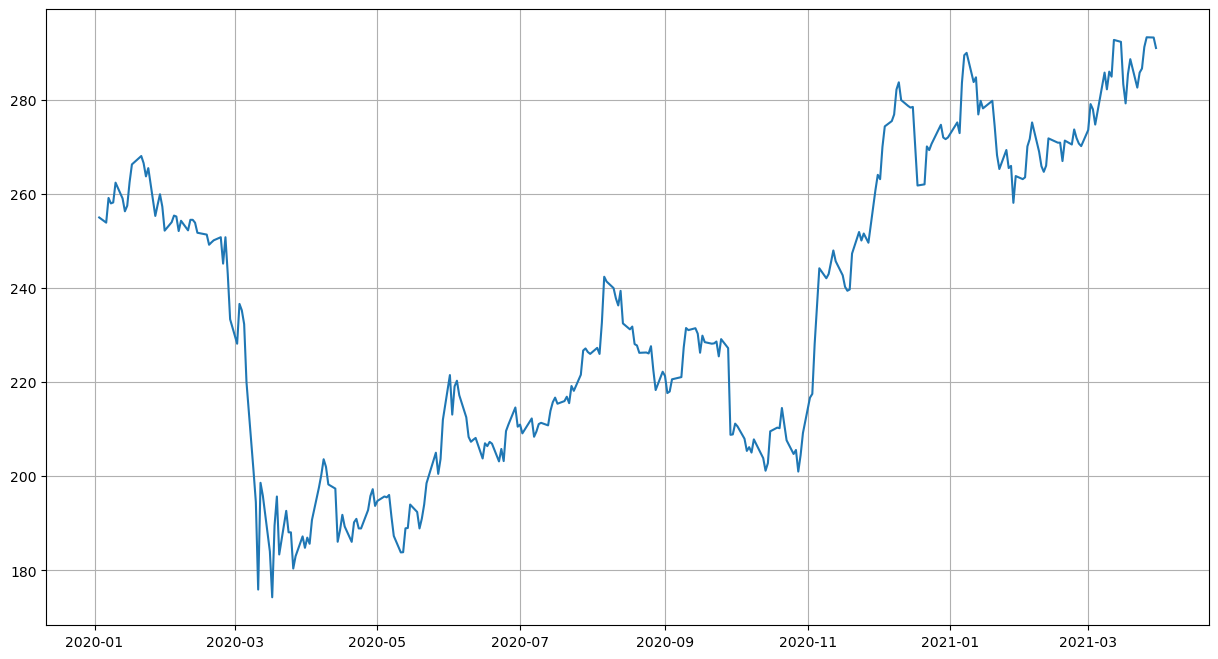

In [20]:
# Plotting
plt.plot(df_date['Time_Stamp'], df_date['Price'])
plt.grid()
plt.show()


We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [21]:
df_date.describe()

Price                     Time_Stamp
count  311.000000                            311
mean   234.524019  2020-08-15 01:23:20.643086848
min    174.270000            2020-01-03 00:00:00
25%    207.700000            2020-04-23 12:00:00
50%    229.140000            2020-08-13 00:00:00
75%    264.380000            2020-12-05 12:00:00
max    293.300000            2021-03-30 00:00:00
std     32.079847                            NaN

The basic measures of descriptive statistics provide valuable insights into the overall distribution of the 'Price', incorporating the time component allows for a more comprehensive analysis that captures temporal dynamics and facilitates better decision-making

In [22]:
## Alternate way of reading the data as time series.
## Squeese = True will return the index col as series

df_final = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv', parse_dates=True, index_col=0)
df_final = df_final.squeeze()

In [23]:
df_final.head()

Price    Open    High     Low    Vol. Change %
Date                                                         
Mar 31, 2021  291.02     294  294.42  290.26  47.00M   -0.76%
Mar 30, 2021  293.25  294.86  295.72   291.5  38.81M   -0.02%
Mar 29, 2021   293.3  289.72  294.09  289.26  43.68M    0.71%
Mar 26, 2021  291.22  288.63  292.75  288.32  56.07M    1.59%
Mar 25, 2021  286.66   286.5  287.03  283.85  35.22M    0.30%

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, Mar 31, 2021 to Highest: 296.07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     312 non-null    object
 1   Open      312 non-null    object
 2   High      312 non-null    object
 3   Low       312 non-null    object
 4   Vol.      311 non-null    object
 5   Change %  311 non-null    object
dtypes: object(6)
memory usage: 17.1+ KB


In [25]:
# Convert numeric columns to float
numeric_columns = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

for col in numeric_columns:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

# Check the data types again
print(df_final.dtypes)

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object


In [26]:
rcParams['figure.figsize'] = 15,8

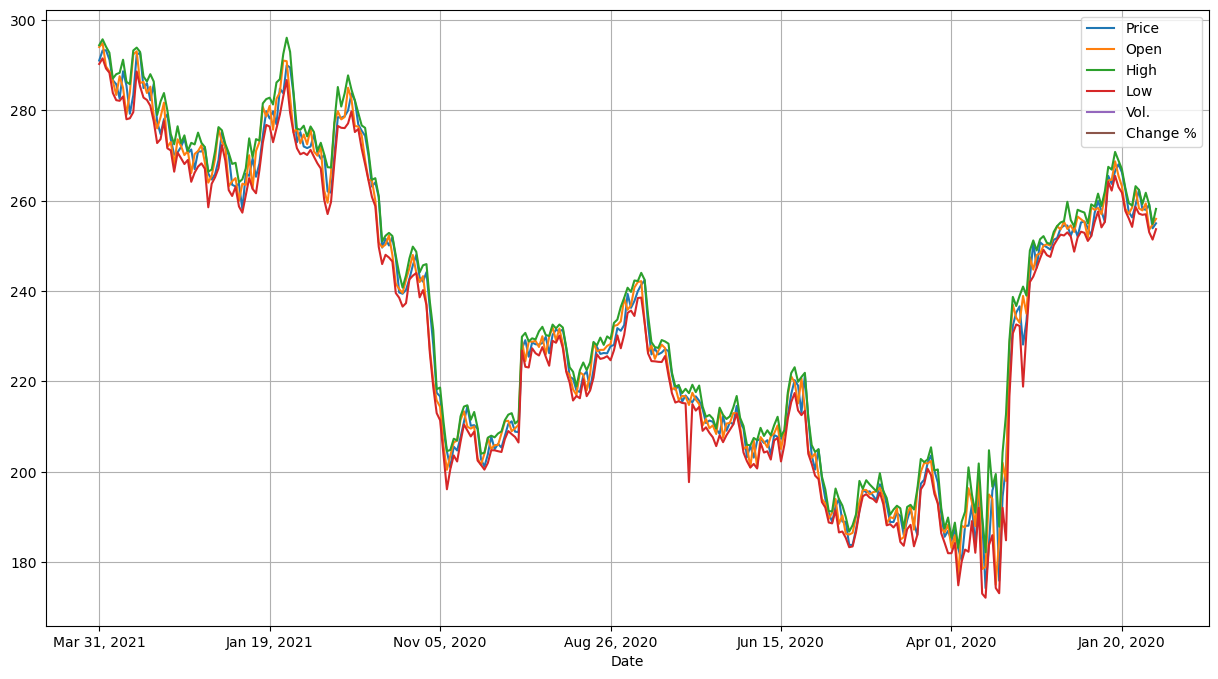

In [27]:
df_final.plot();
plt.grid()

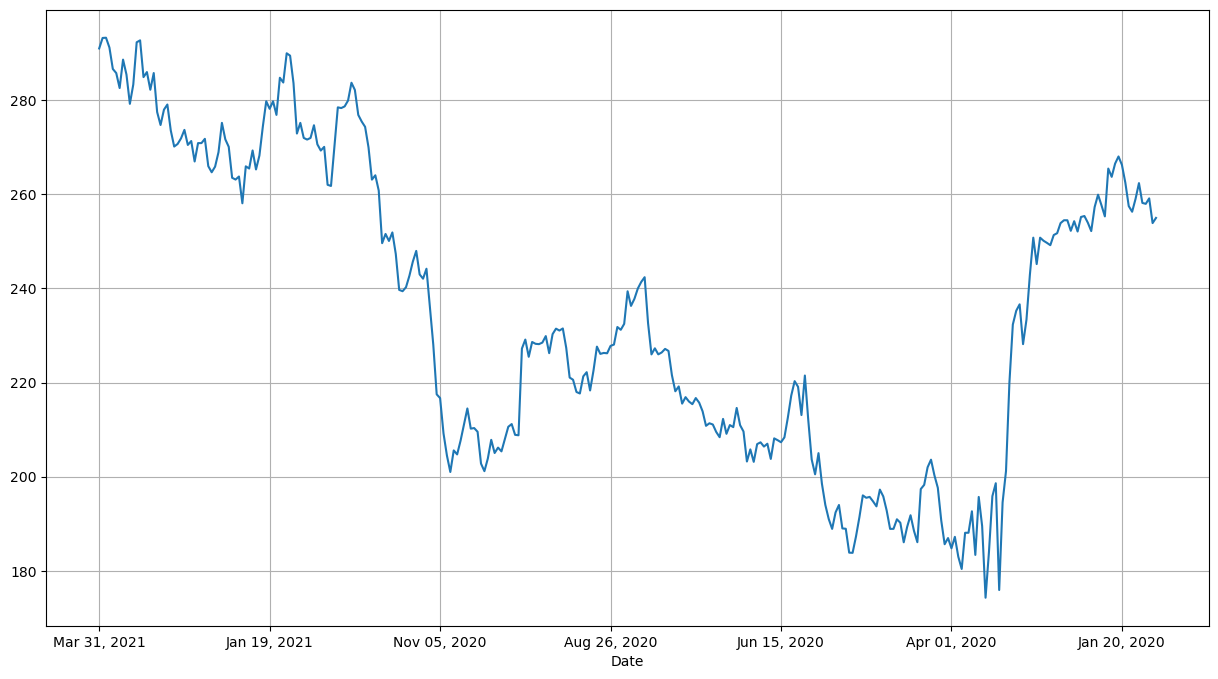

In [28]:
df_final['Price'].plot();
plt.grid()

Yearly Plot

# Plot the boxplot of the 'Open' variable with respect to the different years.

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


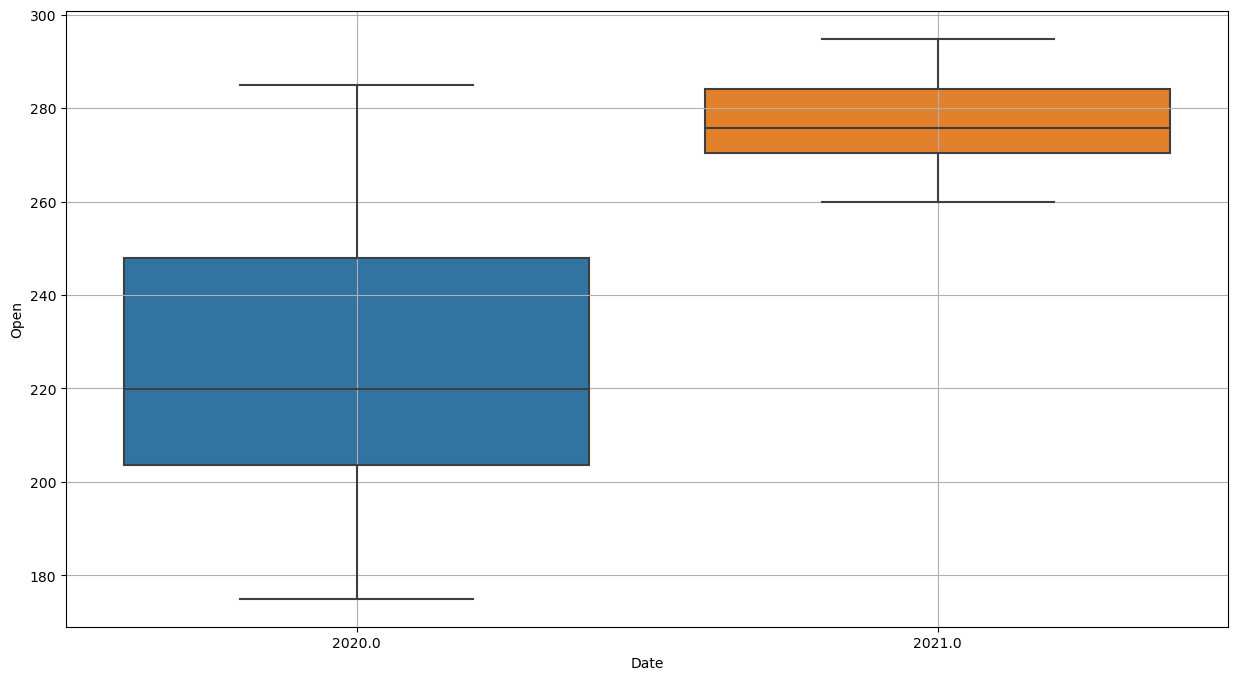

In [29]:
# Convert the index to DateTimeIndex
df_final.index = pd.to_datetime(df_final.index, errors='coerce')

# Check if the conversion was successful
print(type(df_final.index))

# Create the boxplot
sns.boxplot(x=df_final.index.year, y=df_final['Open'])
plt.grid()
plt.show()

# Plot the boxplot of the 'Open' variable with respect to months of different.

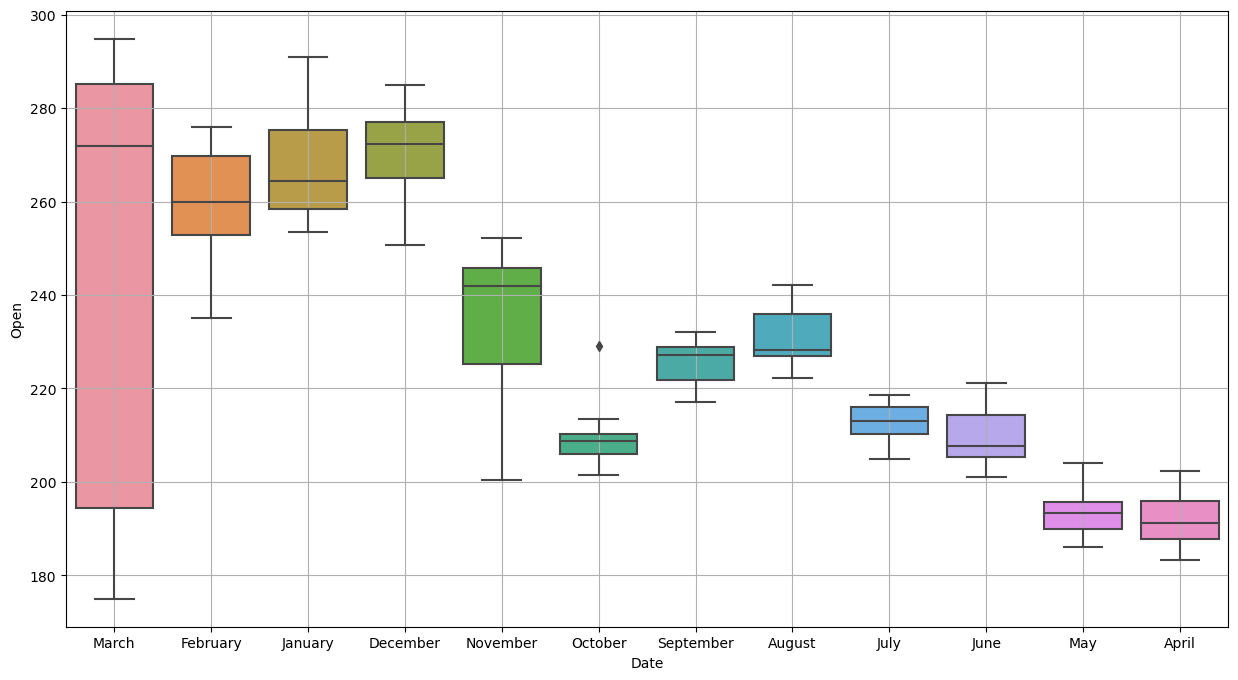

In [30]:
sns.boxplot(x = df_final.index.month_name(),y = df_final['Open'])
plt.grid();

## Decompose the 'Price' variable Time Series.

In [31]:
df_date.head()
df_date.tail()

Date   Price Time_Stamp
306  Mar 25, 2021  286.66 2021-03-24
307  Mar 26, 2021  291.22 2021-03-25
308  Mar 29, 2021  293.30 2021-03-26
309  Mar 30, 2021  293.25 2021-03-29
310  Mar 31, 2021  291.02 2021-03-30

In [32]:
# Decompose the 'Volume' variable Time Series.

df_date['Time_Stamp'] = pd.to_datetime(df_date['Time_Stamp'])
df_model = df_date.set_index('Time_Stamp')
df_model.drop(['Date'], axis=1, inplace=True)
df_model.tail()

Price
Time_Stamp        
2021-03-24  286.66
2021-03-25  291.22
2021-03-26  293.30
2021-03-29  293.25
2021-03-30  291.02

In [33]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

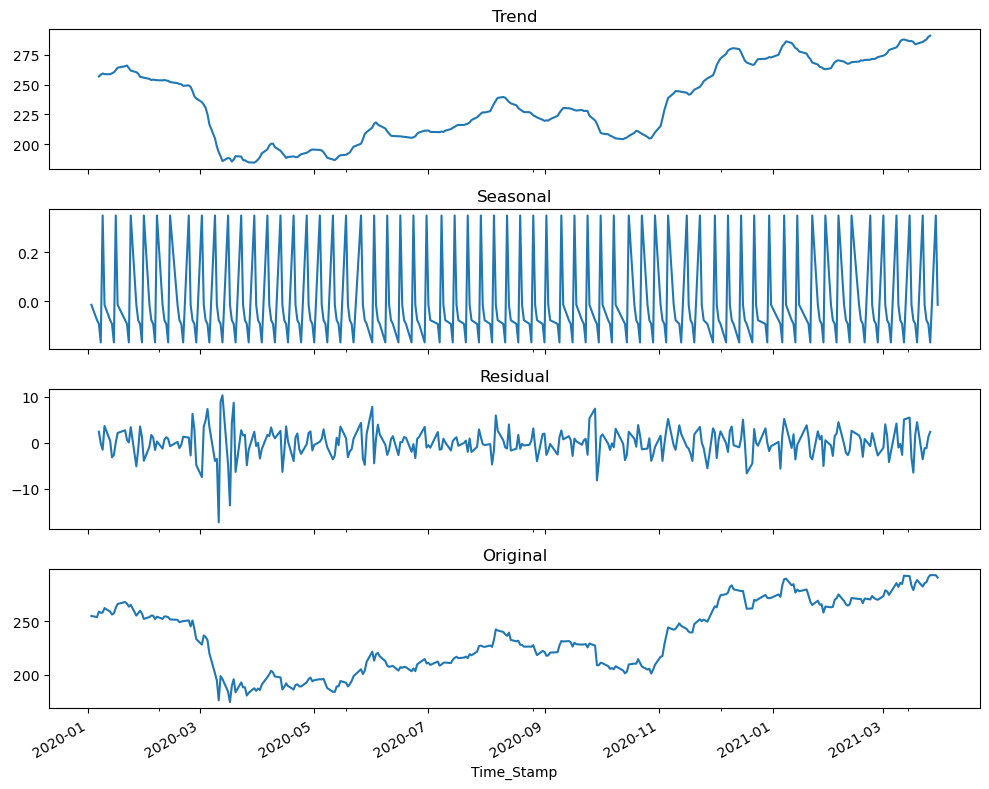

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Drop missing values in 'Price' column
df_model.dropna(subset=['Price'], inplace=True)

# Convert 'Price' column to numeric values
df_model['Price'] = pd.to_numeric(df_model['Price'], errors='coerce')

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_model['Price'], model='additive', period=5)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonal')
decomposition.resid.plot(ax=ax3, title='Residual')
df_model['Price'].plot(ax=ax4, title='Original')

plt.tight_layout()
plt.show()

We see that the residuals have a pattern in this decomposition.

In [35]:
trend = decomposition.trend.fillna(value=0)
seasonality = decomposition.seasonal.fillna(value=0)
residual = decomposition.resid.fillna(value=0)

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Trend 
 Time_Stamp
2020-01-03      0.000
2020-01-06      0.000
2020-01-07    256.846
2020-01-08    258.326
2020-01-09    259.356
2020-01-10    258.788
2020-01-13    258.692
2020-01-14    259.554
2020-01-15    260.330
2020-01-16    262.132
2020-01-17    264.178
2020-01-21    265.422
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2020-01-03   -0.014090
2020-01-06   -0.076582
2020-01-07   -0.091924
2020-01-08   -0.167150
2020-01-09    0.349746
2020-01-10   -0.014090
2020-01-13   -0.076582
2020-01-14   -0.091924
2020-01-15   -0.167150
2020-01-16    0.349746
2020-01-17   -0.014090
2020-01-21   -0.076582
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    2.395924
2020-01-08   -0.168850
2020-01-09   -1.515746
2020-01-10    3.626090
2020-01-13    0.434582
2020-01-14   -3.152076
2020-01-15   -2.652850
2020-01-16    0.018254
2020-01-17    2.116090
2020-01-21    2.714582
Name: resid, dtype: float64 



### Multiplicative Decomposition

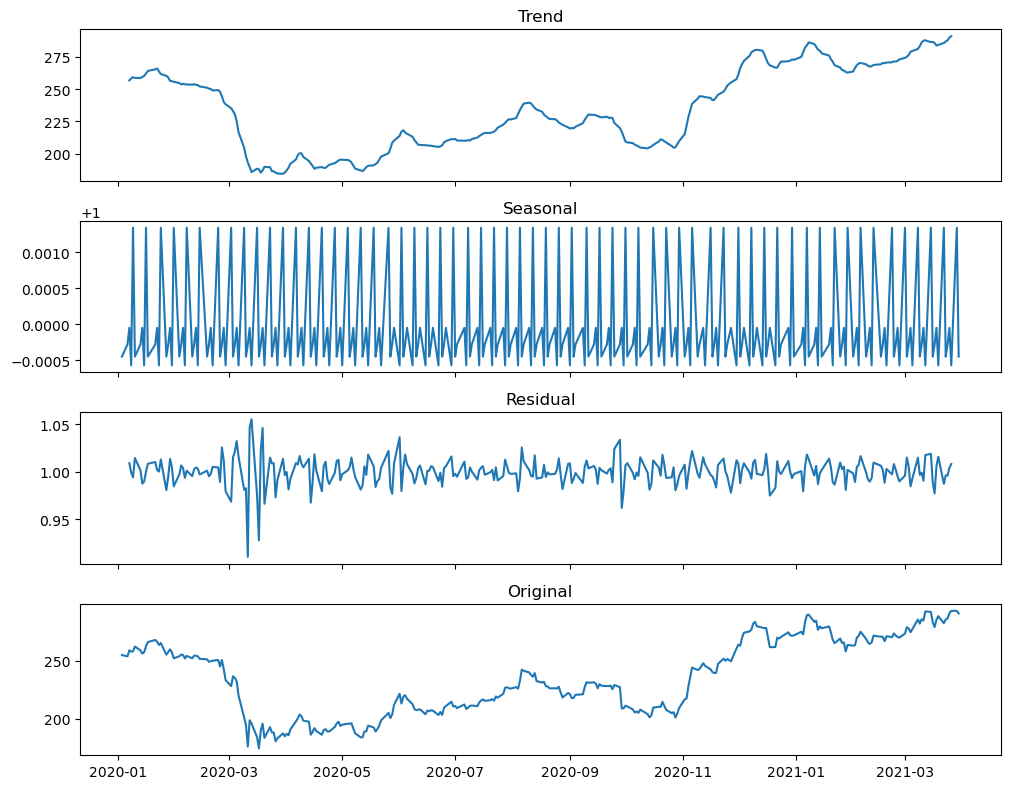

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'df_model' is your DataFrame with a DateTimeIndex
decomposition = seasonal_decompose(df_model['Price'], model='multiplicative', period=5)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ax1.plot(decomposition.trend, label='Trend')
ax1.set_title('Trend')
ax2.plot(decomposition.seasonal, label='Seasonal')
ax2.set_title('Seasonal')
ax3.plot(decomposition.resid, label='Residual')
ax3.set_title('Residual')
ax4.plot(df_model['Price'], label='Original')
ax4.set_title('Original')

plt.tight_layout()
plt.show()

So series is Additive

In [37]:
trend = decomposition.trend.fillna(value=0)
seasonality = decomposition.seasonal.fillna(value=0)
residual = decomposition.resid.fillna(value=0)

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Trend 
 Time_Stamp
2020-01-03      0.000
2020-01-06      0.000
2020-01-07    256.846
2020-01-08    258.326
2020-01-09    259.356
2020-01-10    258.788
2020-01-13    258.692
2020-01-14    259.554
2020-01-15    260.330
2020-01-16    262.132
2020-01-17    264.178
2020-01-21    265.422
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2020-01-03    0.999551
2020-01-06    0.999722
2020-01-07    0.999952
2020-01-08    0.999430
2020-01-09    1.001344
2020-01-10    0.999551
2020-01-13    0.999722
2020-01-14    0.999952
2020-01-15    0.999430
2020-01-16    1.001344
2020-01-17    0.999551
2020-01-21    0.999722
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    1.009019
2020-01-08    0.999268
2020-01-09    0.994168
2020-01-10    1.014412
2020-01-13    1.001663
2020-01-14    0.987549
2020-01-15    0.989731
2020-01-16    1.000060
2020-01-17    1.008409
2020-01-21    1.010220
Name: resid, dtype: float64 



For the multiplicative series, we see that a lot of residuals are located around 1.

# Split the data into training and test set before building the models.

Training Data is till the end of 2020. Test Data is from the beginning of 2021 to the last time stamp provided.

In [38]:
### We will consider the original dataset and subseqeuntly we would require exogeneous variables

df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

Date   Price    Open    High     Low Time_Stamp
306  Mar 25, 2021  286.66   286.5  287.03  283.85 2021-03-24
307  Mar 26, 2021  291.22  288.63  292.75  288.32 2021-03-25
308  Mar 29, 2021   293.3  289.72  294.09  289.26 2021-03-26
309  Mar 30, 2021  293.25  294.86  295.72   291.5 2021-03-29
310  Mar 31, 2021  291.02     294  294.42  290.26 2021-03-30

In [39]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df_final_model = df.set_index('Time_Stamp')
# df_final_model.drop(['Date'], axis=1, inplace=True)
df_final_model

Date   Price    Open    High     Low
Time_Stamp                                              
2020-01-03  Jan 03, 2020     255  255.99  258.19   253.7
2020-01-06  Jan 06, 2020   253.9  254.75  254.84   251.4
2020-01-07  Jan 08, 2020  259.15  253.57  259.15  253.03
2020-01-08  Jan 09, 2020  257.99   259.4  261.76  257.01
2020-01-09  Jan 10, 2020  258.19  257.86  259.25  256.88
...                  ...     ...     ...     ...     ...
2021-03-24  Mar 25, 2021  286.66   286.5  287.03  283.85
2021-03-25  Mar 26, 2021  291.22  288.63  292.75  288.32
2021-03-26  Mar 29, 2021   293.3  289.72  294.09  289.26
2021-03-29  Mar 30, 2021  293.25  294.86  295.72   291.5
2021-03-30  Mar 31, 2021  291.02     294  294.42  290.26

[311 rows x 5 columns]

In [40]:
# Split the series into train and test
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2020-01-03  Jan 03, 2020     255  255.99  258.19   253.7      1  2020
2020-01-06  Jan 06, 2020   253.9  254.75  254.84   251.4      1  2020
2020-01-07  Jan 08, 2020  259.15  253.57  259.15  253.03      1  2020
2020-01-08  Jan 09, 2020  257.99   259.4  261.76  257.01      1  2020
2020-01-09  Jan 10, 2020  258.19  257.86  259.25  256.88      1  2020

In [41]:
df_final_model.tail()

Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2021-03-24  Mar 25, 2021  286.66   286.5  287.03  283.85      3  2021
2021-03-25  Mar 26, 2021  291.22  288.63  292.75  288.32      3  2021
2021-03-26  Mar 29, 2021   293.3  289.72  294.09  289.26      3  2021
2021-03-29  Mar 30, 2021  293.25  294.86  295.72   291.5      3  2021
2021-03-30  Mar 31, 2021  291.02     294  294.42  290.26      3  2021

In [42]:
df.tail()

Date   Price    Open    High     Low Time_Stamp
306  Mar 25, 2021  286.66   286.5  287.03  283.85 2021-03-24
307  Mar 26, 2021  291.22  288.63  292.75  288.32 2021-03-25
308  Mar 29, 2021   293.3  289.72  294.09  289.26 2021-03-26
309  Mar 30, 2021  293.25  294.86  295.72   291.5 2021-03-29
310  Mar 31, 2021  291.02     294  294.42  290.26 2021-03-30

In [43]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2021-01-31')]
train.shape

(269, 7)

In [44]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2021-01-31')]
test.shape

(42, 7)

In [45]:
train_final = train[['Price']]
test_final=test[['Price']]


In [46]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2020-01-03  Jan 03, 2020     255  255.99  258.19   253.7      1  2020
2020-01-06  Jan 06, 2020   253.9  254.75  254.84   251.4      1  2020
2020-01-07  Jan 08, 2020  259.15  253.57  259.15  253.03      1  2020
2020-01-08  Jan 09, 2020  257.99   259.4  261.76  257.01      1  2020
2020-01-09  Jan 10, 2020  258.19  257.86  259.25  256.88      1  2020
...                  ...     ...     ...     ...     ...    ...   ...
2021-01-22  Jan 25, 2021   265.3     271  273.63  261.65      1  2021
2021-01-25  Jan 26, 2021  269.34   262.7  269.57  262.61      1  2021
2021-01-26  Jan 27, 2021   265.5  270.07   273.8  265.02      1  2021
2021-01-27  Jan 28, 2021  265.96   263.5  267.17  261.17      1  2021
2021-01-28  Jan 29, 2021  258.11  263.77  264.75  257.36      1  2021

[269 rows x 7 columns]

Test Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2021-01-29  Feb 01, 2021   263.8     260  264.06  258.73      1  2021
2021-02-01  Feb 02, 2021  263.15     265  268.39  263.05      2  2021
2021-02-02  Feb 03, 2021  263.53  264.32  268.14  261.05      2  2021
2021-02-03  Feb 04, 2021  270.11  263.21   270.6  262.34      2  2021
2021-02-04  Feb 05, 2021   271.7  271.99  272.57  268.87      2  2021
2021-02-05  Feb 08, 2021   275.2  273.01  275.58  272.32      2  2021
2021-02-08  Feb 09, 2021  268.98  275.99  276.29  267.19      2  2021
2021-02-09  Feb 10, 2021   265.9  269.28  270.99   265.2      2  2021
2021-02-10  Feb 11, 2021   264.7   265.5   266.9  263.75      2  2021
2021-02-11  Feb 12, 2021     266     264  266.44  258.55      2  2021
2021-02-12  Feb 15, 2021  271.81  268.49  271.87  267.07      2  2021
2021-02-16  Feb 16, 2021   270.9   272.3   272.8  268.27      2  2021
2021-02-17  Feb 17, 2021   270.9  270.99  275.07  267.56      2  2021
2021-02-18  Feb 18, 2021  266.99  270.35  272.46  266.21      2  2021
2021-02-19  Feb 19, 2021  271.34  266.12  272.81  264.19      2  2021
2021-02-22  Feb 20, 2021  270.51     271     271  269.02      2  2021
2021-02-23  Feb 22, 2021  273.71   270.1  274.46  268.12      2  2021
2021-02-24  Feb 24, 2021   271.9  272.12  272.75  269.42      2  2021
2021-02-25  Feb 25, 2021  270.71   273.6  276.48  270.65      2  2021
2021-02-26  Feb 26, 2021  270.17     268  272.49  266.43      2  2021
2021-03-01  Mar 01, 2021  273.58     273  274.73  271.13      3  2021
2021-03-02  Mar 02, 2021   279.1  271.89     280   271.6      3  2021
2021-03-03  Mar 03, 2021  278.01   281.7  283.83  277.63      3  2021
2021-03-04  Mar 04, 2021  274.75   278.5  281.96  273.63      3  2021
2021-03-05  Mar 05, 2021   277.5     276  278.98  272.76      3  2021
2021-03-08  Mar 09, 2021  285.79   278.8  286.38  277.56      3  2021
2021-03-09  Mar 10, 2021  282.24  285.24     288     281      3  2021
2021-03-10  Mar 11, 2021     286  283.84  286.38   282.3      3  2021
2021-03-11  Mar 12, 2021  284.93   286.3  287.49  282.82      3  2021
2021-03-12  Mar 15, 2021  292.74  286.05  292.92  285.28      3  2021
2021-03-15  Mar 16, 2021  292.33  293.06  293.88  288.61      3  2021
2021-03-16  Mar 17, 2021  283.35  292.35  293.25   279.6      3  2021
2021-03-17  Mar 18, 2021  279.25  284.04  285.79  278.24      3  2021
2021-03-18  Mar 19, 2021  285.47     279  286.31  278.03      3  2021
2021-03-19  Mar 22, 2021  288.65     285   291.2  283.08      3  2021
2021-03-22  Mar 23, 2021   282.6  287.56   288.3  282.11      3  2021
2021-03-23  Mar 24, 2021  285.79   283.4     288  282.25      3  2021
2021-03-24  Mar 25, 2021  286.66   286.5  287.03  283.85      3  2021
2021-03-25  Mar 26, 2021  291.22  288.63  292.75  288.32      3  2021
2021-03-26  Mar 29, 2021   293.3  289.72  294.09  289.26      3  2021
2021-03-29  Mar 30, 2021  293.25  294.86  295.72   291.5      3  2021
2021-03-30  Mar 31, 2021  291.02     294  294.42  290.26      3  2021

In [47]:
print(train_final.shape)
print(test_final.shape)

(269, 1)
(42, 1)


In [48]:
train_final.tail()

Price
Time_Stamp        
2021-01-22   265.3
2021-01-25  269.34
2021-01-26   265.5
2021-01-27  265.96
2021-01-28  258.11

In [49]:
test_final.tail()

Price
Time_Stamp        
2021-03-24  286.66
2021-03-25  291.22
2021-03-26   293.3
2021-03-29  293.25
2021-03-30  291.02

In [50]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2020-01-03  Jan 03, 2020     255  255.99  258.19   253.7      1  2020
2020-01-06  Jan 06, 2020   253.9  254.75  254.84   251.4      1  2020
2020-01-07  Jan 08, 2020  259.15  253.57  259.15  253.03      1  2020
2020-01-08  Jan 09, 2020  257.99   259.4  261.76  257.01      1  2020
2020-01-09  Jan 10, 2020  258.19  257.86  259.25  256.88      1  2020

Last few rows of Training Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2021-01-22  Jan 25, 2021   265.3     271  273.63  261.65      1  2021
2021-01-25  Jan 26, 2021  269.34   262.7  269.57  262.61      1  2021
2021-01-26  Jan 27, 2021   265.5  270.07   273.8  265.02      1  2021
2021-01-27  Jan 28, 2021  265.96   263.5  267.17  261.17      1  2021
2021-01-28  Jan 29, 2021  258.11  263.77  264.75  257.36      1  2021

First few rows of Test Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2021-01-29  Feb 01, 2021   263.8     260  264.06  258.73      1  2021
2021-02-01  Feb 02, 2021  263.15     265  268.39  263.05      2  2021
2021-02-02  Feb 03, 2021  263.53  264.32  268.14  261.05      2  2021
2021-02-03  Feb 04, 2021  270.11  263.21   270.6  262.34      2  2021
2021-02-04  Feb 05, 2021   271.7  271.99  272.57  268.87      2  2021

Last few rows of Test Data


Date   Price    Open    High     Low  Month  Year
Time_Stamp                                                           
2021-03-24  Mar 25, 2021  286.66   286.5  287.03  283.85      3  2021
2021-03-25  Mar 26, 2021  291.22  288.63  292.75  288.32      3  2021
2021-03-26  Mar 29, 2021   293.3  289.72  294.09  289.26      3  2021
2021-03-29  Mar 30, 2021  293.25  294.86  295.72   291.5      3  2021
2021-03-30  Mar 31, 2021  291.02     294  294.42  290.26      3  2021

In [51]:
print(train.shape)
print(test.shape)

(269, 7)
(42, 7)


# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [52]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

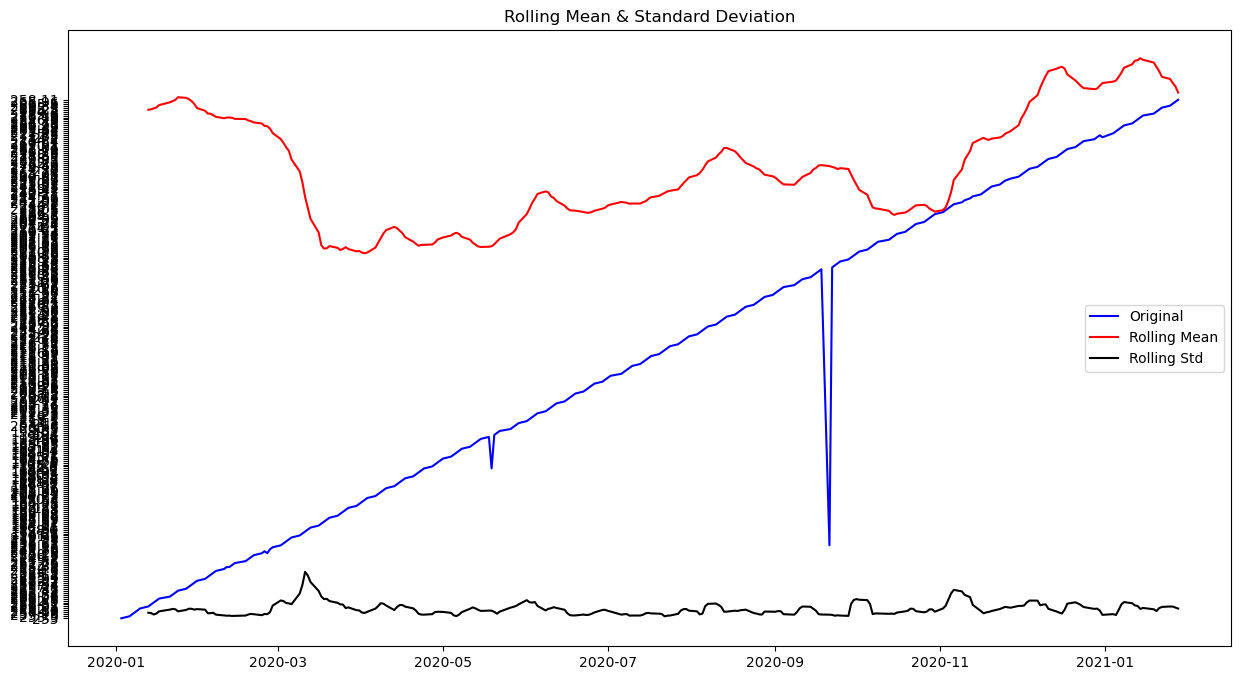

Results of Dickey-Fuller Test:
Test Statistic                  -1.678662
p-value                          0.442139
#Lags Used                       8.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64 



In [53]:
test_stationarity(train_final['Price'])

## Series is stationary at 5% Alpha as per Dicky Fuller

In [54]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


Let us plot the training data once.

# Model Selection

First we will train and evaluate the following model and make a selection.

* ARIMA model
* SARIMA model
* fbprophet model
* Keras LSTM

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [55]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [56]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [57]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the range for p, d, and q
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

# Create a list of tuples containing all possible combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Initialize an empty list to store AIC values
ARIMA_AIC = []

# Replace this with your actual price data
price_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for param in pdq:
    ARIMA_model = ARIMA(price_data, order=param).fit()  # Replace this with your actual price data
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic})

# Convert the list of AIC values into a DataFrame
ARIMA_AIC_df = pd.DataFrame(ARIMA_AIC)



ARIMA(0, 0, 0) - AIC:99.53260453230253
ARIMA(0, 0, 1) - AIC:92.94455876901922
ARIMA(0, 0, 2) - AIC:87.12385604775815
ARIMA(0, 1, 0) - AIC:68.98742527404838
ARIMA(0, 1, 1) - AIC:61.761697307249555


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2) - AIC:55.66460899061261
ARIMA(0, 2, 0) - AIC:-160.74266169207124
ARIMA(0, 2, 1) - AIC:-158.74266169207124
ARIMA(0, 2, 2) - AIC:-156.74266169207124
ARIMA(1, 0, 0) - AIC:83.24107366580836
ARIMA(1, 0, 1) - AIC:76.22723219692597
ARIMA(1, 0, 2) - AIC:70.28715995871397
ARIMA(1, 1, 0) - AIC:-21.000326833341763


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1) - AIC:-41.297878329222534
ARIMA(1, 1, 2) - AIC:-37.25240258194637
ARIMA(1, 2, 0) - AIC:-158.74266169207124


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1) - AIC:-156.74266169207124
ARIMA(1, 2, 2) - AIC:-154.74266169207124
ARIMA(2, 0, 0) - AIC:-9.510482052122835


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1) - AIC:-0.5022912376760083


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2) - AIC:-14.98529025466495
ARIMA(2, 1, 0) - AIC:-49.21670432750438


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1) - AIC:-61.158423023946014
ARIMA(2, 1, 2) - AIC:-64.31554956609543
ARIMA(2, 2, 0) - AIC:-156.74266169207124
ARIMA(2, 2, 1) - AIC:-154.74266169207124
ARIMA(2, 2, 2) - AIC:-152.74266169207124


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import itertools

# Load your dataset
train = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv')

# Initialize an empty list to store AIC values
aic_values = []

# Define the p, d, and q values for ARIMA
p = range(3)
d = range(2)
q = range(3)
pdq = list(itertools.product(p, d, q))

# Price Data
train = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv')

# Drop non-numeric values
train['Price'] = pd.to_numeric(train['Price'], errors='coerce')
train = train.dropna(subset=['Price'])

for param in pdq:
    ARIMA_model = ARIMA(train['Price'].values, order=param).fit()
    aic_values.append({'param': param, 'AIC': ARIMA_model.aic})

# Create a DataFrame from the list of dictionaries
ARIMA_AIC = pd.DataFrame(aic_values)

# Ensure the ARIMA_AIC DataFrame is sorted before using the head method
ARIMA_AIC.sort_values(by='AIC', ascending=True, inplace=True)
ARIMA_AIC.head()


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



param          AIC
17  (2, 1, 2)  1847.229343
3   (0, 1, 0)  1849.818816
4   (0, 1, 1)  1851.625113
9   (1, 1, 0)  1851.644078
15  (2, 1, 0)  1852.857987

In [59]:
import pandas as pd
import numpy as np

# Load your dataset
train = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv')

# Remove any rows where the 'Price' column contains non-numeric values
train = train[pd.to_numeric(train['Price'], errors='coerce').notna()]

# Convert the 'Price' column to float
train['Price'] = pd.to_numeric(train['Price'])

# Now, you should be able to run your ARIMA model

# Define the ARIMA model
auto_ARIMA = ARIMA(train['Price'], order=(2, 1, 2))

# Fit the ARIMA model to your data
results_auto_ARIMA = auto_ARIMA.fit()

# Print the summary of the model
print(results_auto_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  311
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -918.615
Date:                Wed, 21 Feb 2024   AIC                           1847.229
Time:                        10:48:05   BIC                           1865.912
Sample:                             0   HQIC                          1854.698
                                - 311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5590      0.019    -30.136      0.000      -0.595      -0.523
ar.L2         -0.9572      0.017    -56.128      0.000      -0.991      -0.924
ma.L1          0.6139      0.025     24.124      0.0

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Diagnostics plot.

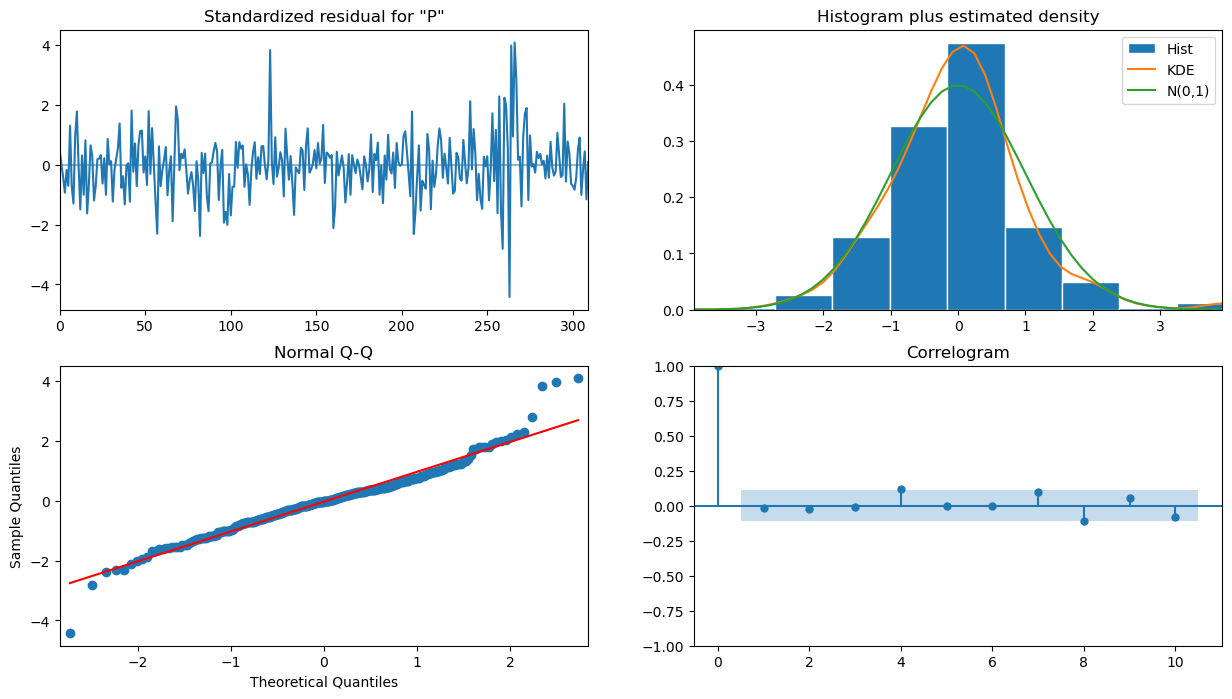

In [60]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [61]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [62]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# Assuming 'test' contains the actual prices and 'predicted_auto_ARIMA' contains the predicted prices

test['Price'] = test['Price'].astype(float)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price'], predicted_auto_ARIMA))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Price'], predicted_auto_ARIMA)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 24.676528039946877
MAPE: 8.14194236670457


In [63]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)  24.676528  8.141942

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

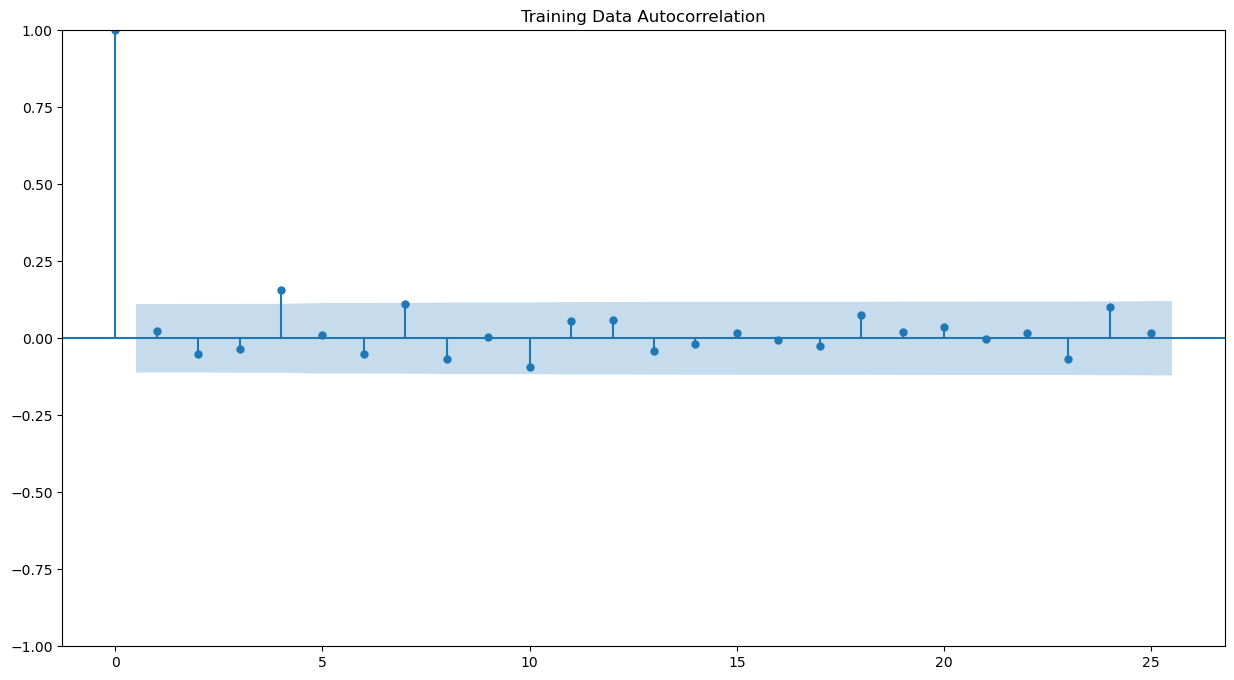

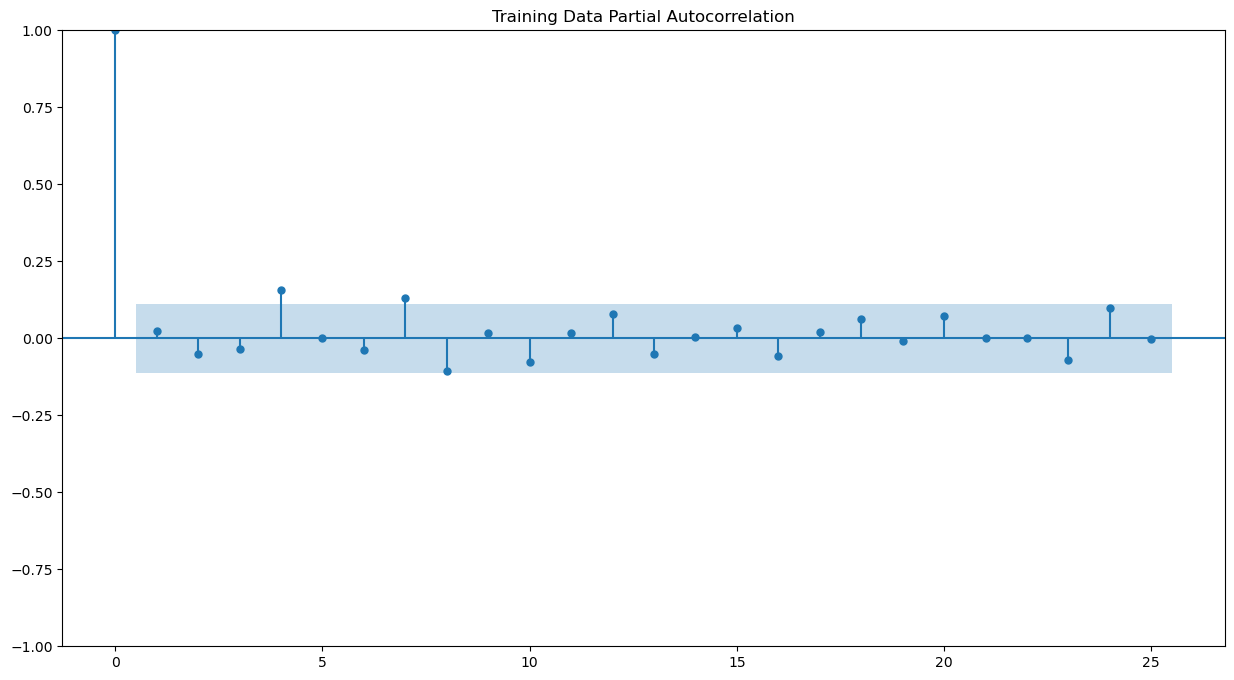

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot autocorrelation
plot_acf(train['Price'].diff().dropna(), title='Training Data Autocorrelation')
plt.show()

# Plot partial autocorrelation
plot_pacf(train['Price'].diff().dropna(), title='Training Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [65]:
import pandas as pd
import numpy as np

# Load your dataset
train = pd.read_csv(r'C:\APZIVA-2023\Project-5\valueinvestor-project5.csv')

# Remove any rows where the 'Price' column contains non-numeric values
train = train[pd.to_numeric(train['Price'], errors='coerce').notna()]

# Convert the 'Price' column to float
train['Price'] = pd.to_numeric(train['Price'])

# Now, you should be able to run your ARIMA model

# Define the ARIMA model
manual_ARIMA = ARIMA(train['Price'], order=(3, 1, 3))

# Fit the ARIMA model to your data
results_manual_ARIMA = manual_ARIMA.fit()

# Print the summary of the model
print(results_manual_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  311
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -921.684
Date:                Wed, 21 Feb 2024   AIC                           1857.368
Time:                        10:48:07   BIC                           1883.524
Sample:                             0   HQIC                          1867.824
                                - 311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2053      0.203      1.011      0.312      -0.193       0.604
ar.L2         -0.2060      0.167     -1.233      0.217      -0.533       0.121
ar.L3          0.9285      0.212      4.376      0.0

C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Let us analyse the residuals from the various diagnostics plot.

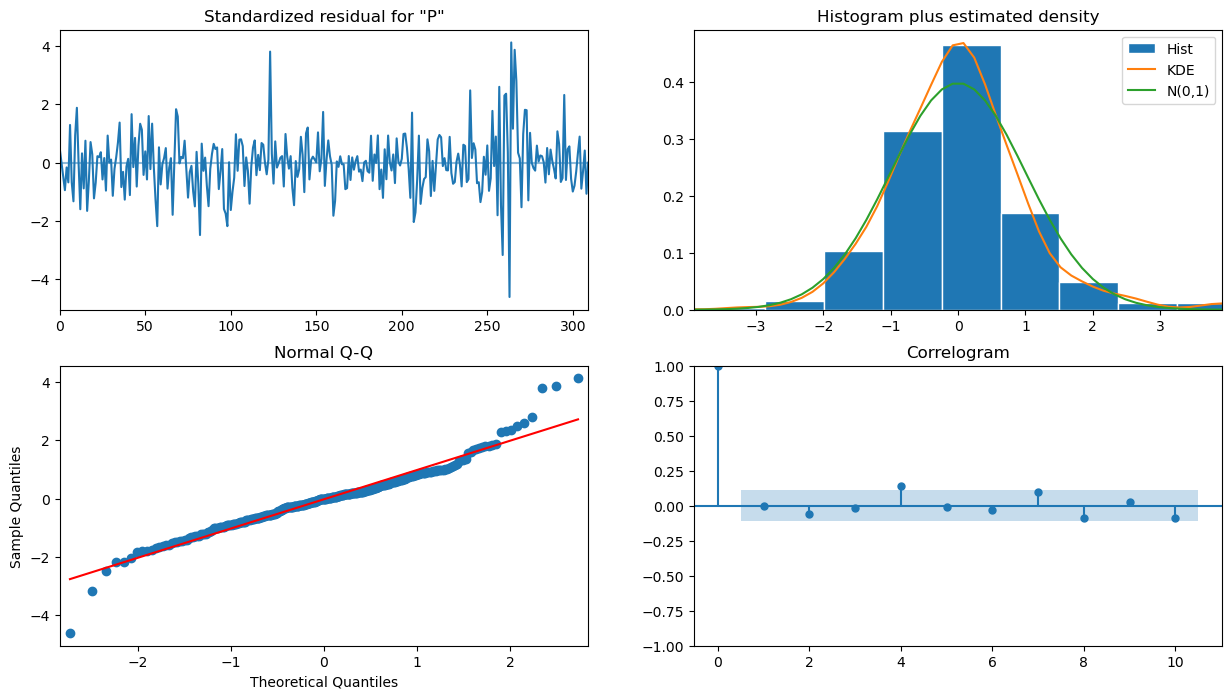

In [66]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [67]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [68]:
rmse = mean_squared_error(test['Price'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Price'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 23.750883249627755 
MAPE: 7.844811065198802


In [69]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)  24.676528  8.141942
ARIMA(3,1,3)  23.750883  7.844811

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

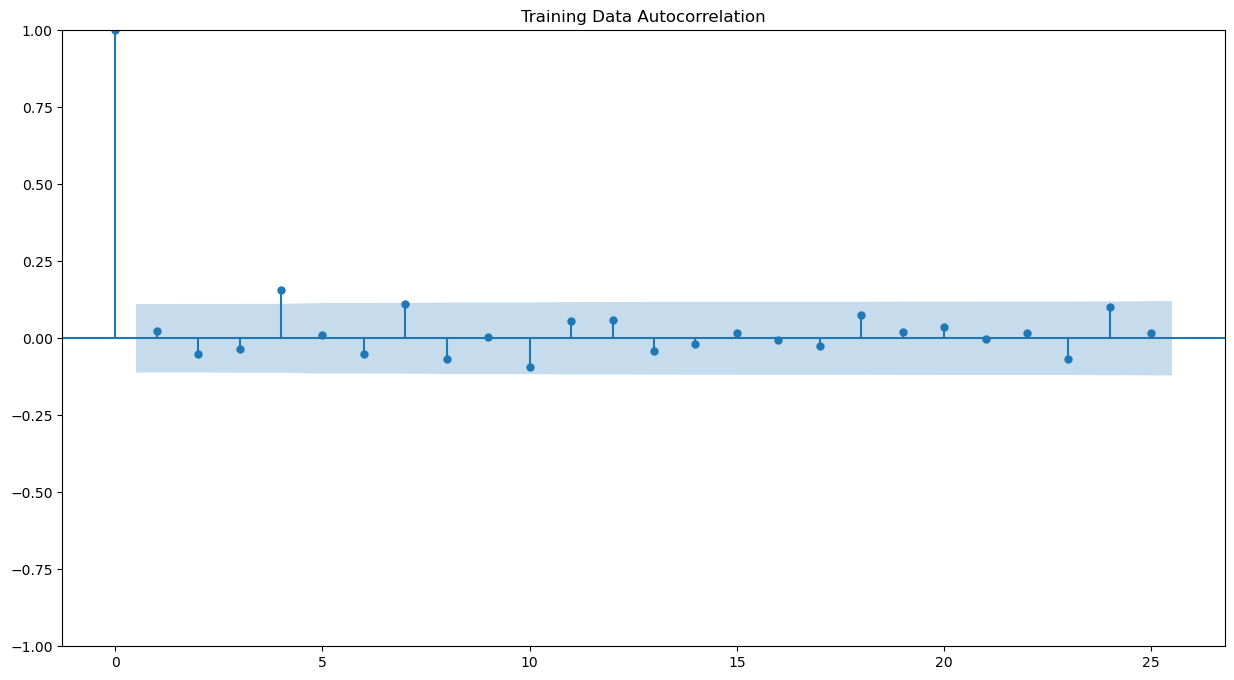

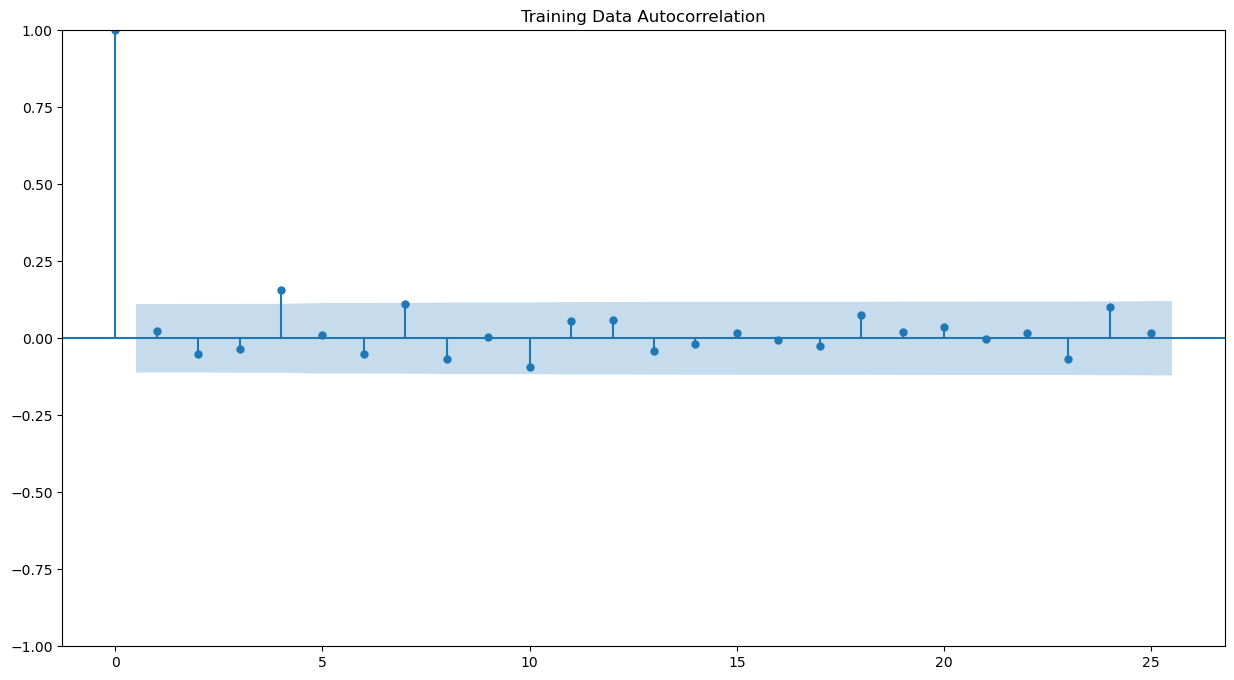

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

# Select 'Price' column and compute differenced series
price_diff = train['Price'].diff().dropna()

# Plot the autocorrelation of the differenced 'Price' series
plot_acf(price_diff, title='Training Data Autocorrelation')

We can see that there is a seasonality.

In [71]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [72]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [73]:
import pandas as pd
import statsmodels.api as sm

# Define ranges for SARIMA parameters
pdq = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]
PDQ = [(0,0,0,12), (0,0,1,12), (0,1,0,12), (0,1,1,12), (1,0,0,12), (1,0,1,12), (1,1,0,12), (1,1,1,12)]

# Initialize a list to store SARIMA AIC values
SARIMA_AIC = []

for param in pdq:
    for param_seasonal in PDQ:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train['Price'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC.append({'param':param, 'param_seasonal': param_seasonal, 'AIC': results_SARIMA.aic})
        except:
            print('Error with SARIMA{}x{}'.format(param, param_seasonal))

# Convert the SARIMA_AIC list of dictionaries to a DataFrame for easy sorting
SARIMA_AIC_df = pd.DataFrame(SARIMA_AIC)

# Sort the DataFrame by AIC values in ascending order
SARIMA_AIC_df_sorted = SARIMA_AIC_df.sort_values(by='AIC')

# Retrieve the best SARIMA model parameters with the lowest AIC
best_SARIMA_params = SARIMA_AIC_df_sorted.iloc[0]

print('Best SARIMA Model Parameters:')
print(best_SARIMA_params)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4270.644636306024
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3748.091530822342
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2559.9293382388114
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2464.4105116926403
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2565.7816449072493


C:\Users\smith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2558.8896289073805
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2473.248093260153
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2465.796423855635
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3841.826405255114
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3342.898760775486
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2284.0782716039566
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2196.977097620012
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2297.274909181834
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2282.3394290097667
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2213.0355685823574
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2196.337947812424
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1844.6381562619372
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1773.9419861539154
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1962.4689708061962
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1740.1786391888136
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1781.2789674949795
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1774.5650770084217
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1802.5544439348114
SARIMA(0, 1, 0)x(

In [74]:
# Sort the SARIMA_AIC list of dictionaries by 'AIC' in ascending order
sorted_SARIMA_AIC = sorted(SARIMA_AIC, key=lambda x: x['AIC'])

# Retrieve the parameters for the minimum AIC value
min_AIC_params = sorted_SARIMA_AIC[0]

# Print the parameters for the minimum AIC value
print("Parameters for the minimum AIC value:")
print(min_AIC_params)

Parameters for the minimum AIC value:
{'param': (0, 1, 1), 'param_seasonal': (0, 1, 1, 12), 'AIC': 1736.916836462131}


In [75]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Price'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  311
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -865.458
Date:                            Wed, 21 Feb 2024   AIC                           1736.917
Time:                                    10:48:31   BIC                           1747.864
Sample:                                         0   HQIC                          1741.306
                                            - 311                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0360      0.039      0.924      0.356      -0.040       0.113
ma.S.L12      -0.8963      0.041   

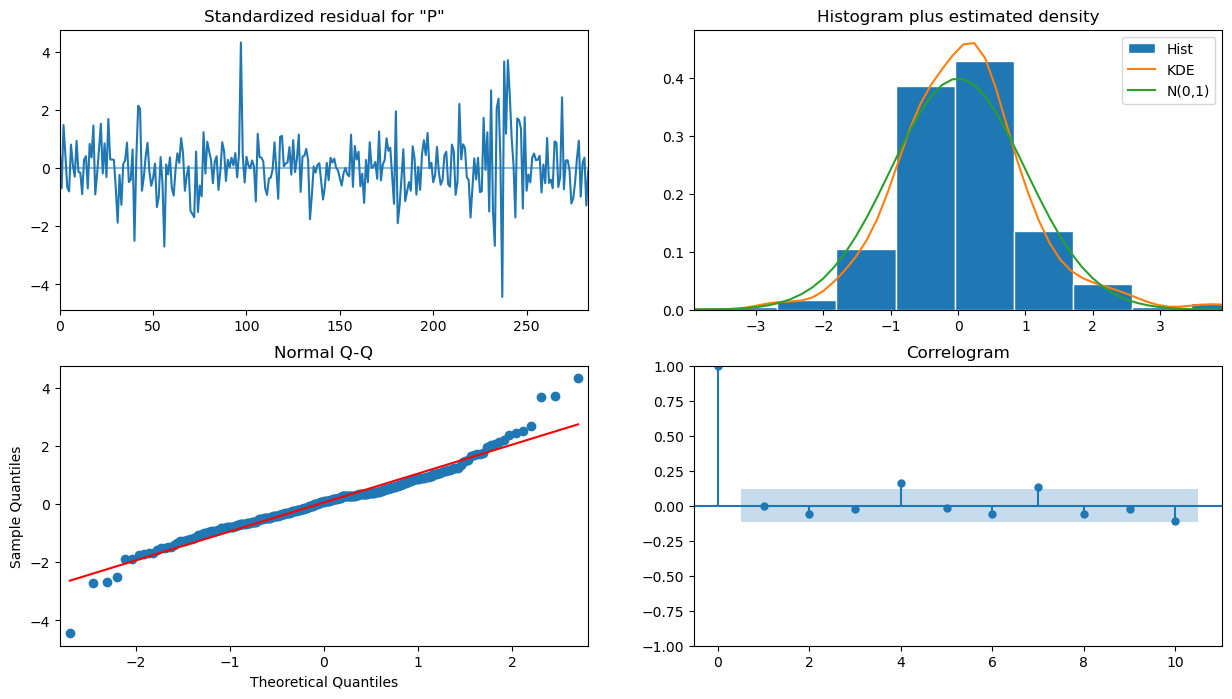

In [76]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [77]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [78]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Price        mean    mean_se  mean_ci_lower  mean_ci_upper
311    255.237032   4.990792     245.455260     265.018805
312    253.711486   7.186373     239.626453     267.796519
313    255.364587   8.853243     238.012549     272.716625
314    255.224724  10.252391     235.130408     275.319041
315    256.306100  11.482296     233.801214     278.810986

In [79]:
rmse = mean_squared_error(test['Price'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Price'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 19.783019045706197 
MAPE: 6.5835315802141885


In [80]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)            24.676528  8.141942
ARIMA(3,1,3)            23.750883  7.844811
SARIMA(1,1,3)(3,0,3,6)  19.783019  6.583532

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

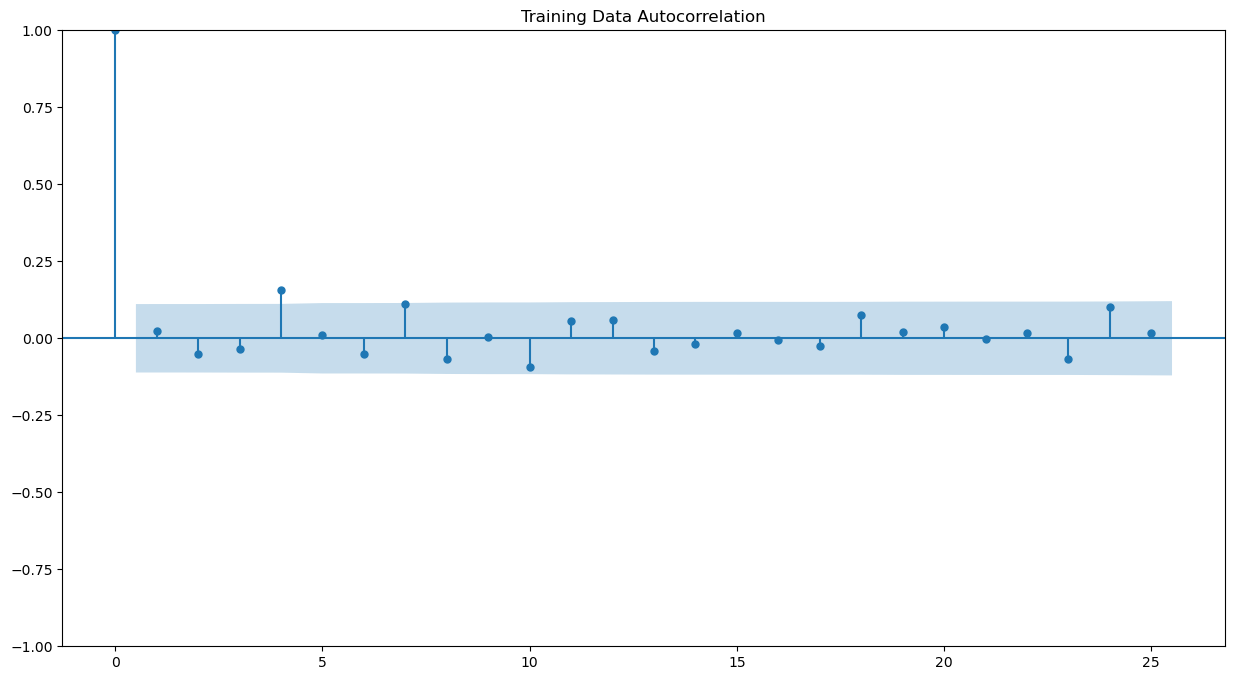

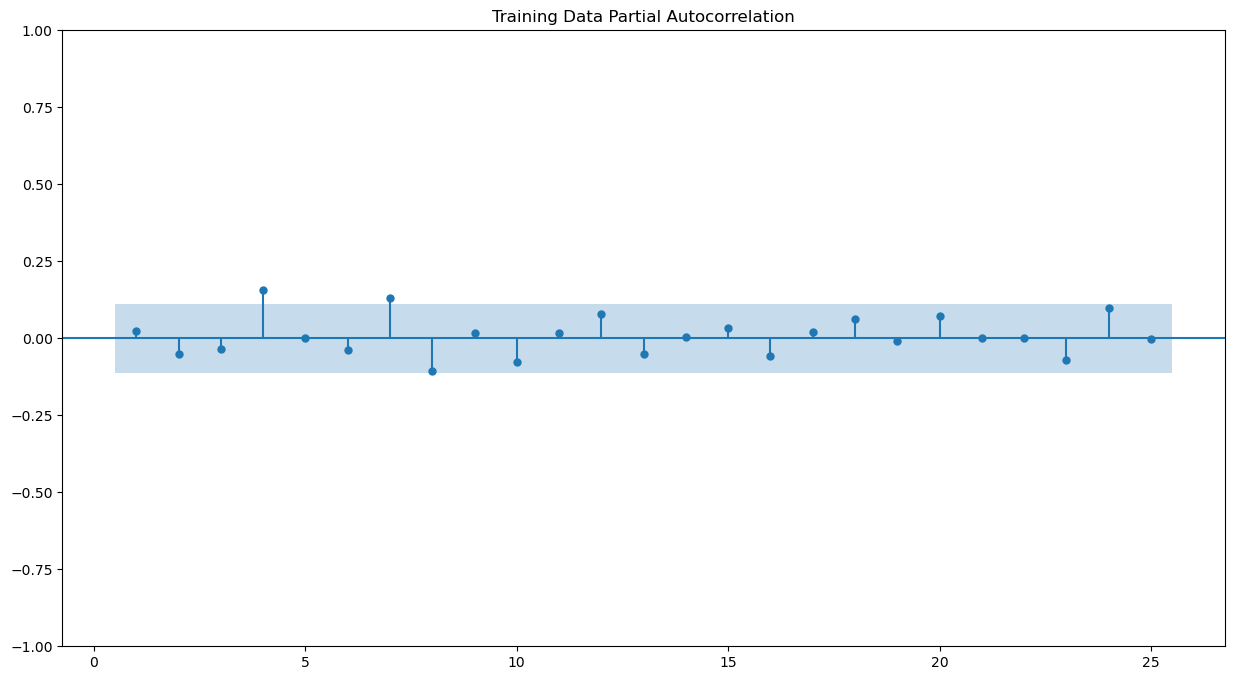

In [81]:
import pandas as pd

# Assuming 'train' is your DataFrame
train['Price'] = pd.to_numeric(train['Price'], errors='coerce')

# Drop rows with missing values
train = train.dropna()

# Compute the first discrete difference
train_diff = train['Price'].diff()

# Plot the autocorrelation and partial autocorrelation functions
plot_acf(train_diff, title='Training Data Autocorrelation', missing='drop')
plot_pacf(train_diff.dropna(), title='Training Data Partial Autocorrelation', zero=False, method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [82]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Price'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Price   No. Observations:                  311
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -854.544
Date:                           Wed, 21 Feb 2024   AIC                           1729.089
Time:                                   10:48:37   BIC                           1765.718
Sample:                                        0   HQIC                          1743.768
                                           - 311                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1989      0.919      0.216      0.829      -1.602       2.000
ar.L2         -0.5522      0.506     -1.090

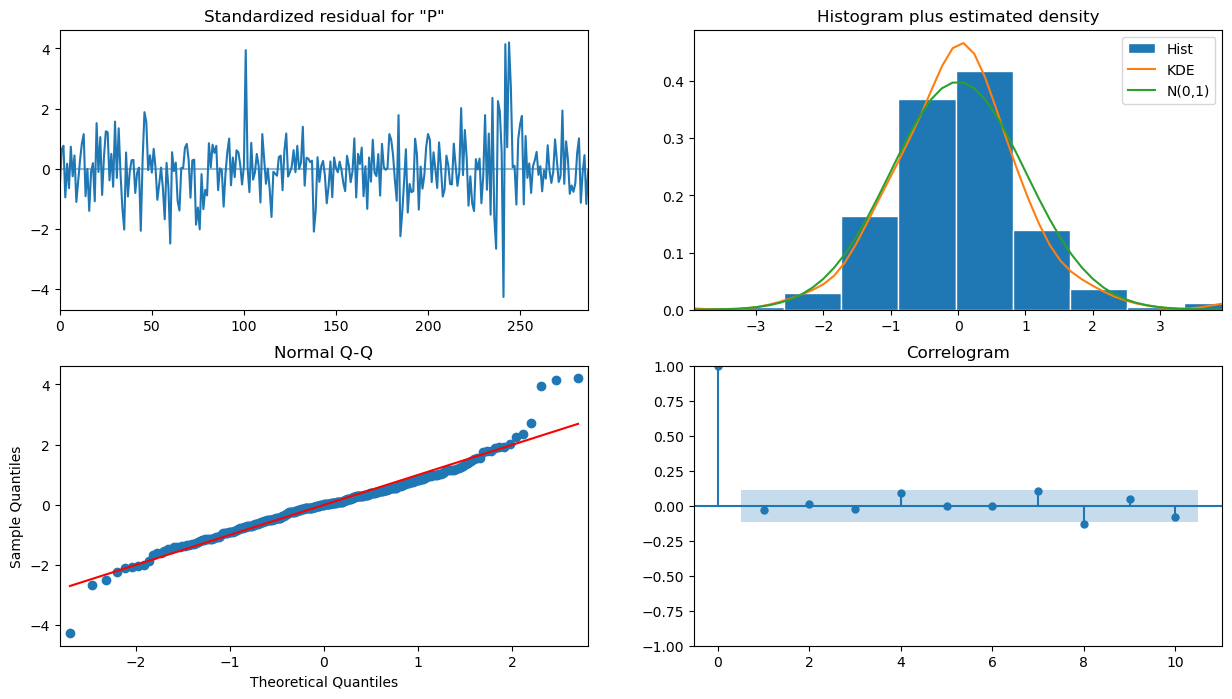

In [83]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [84]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [85]:
rmse = mean_squared_error(test['Price'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Price'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.326591909036644 
MAPE: 8.72893161271512


In [86]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)            24.676528  8.141942
ARIMA(3,1,3)            23.750883  7.844811
SARIMA(1,1,3)(3,0,3,6)  19.783019  6.583532
SARIMA(3,1,3)(0,0,3,6)  26.326592  8.728932

This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [87]:
import pandas as pd

# Assuming `df` is your DataFrame
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove NaN values
df = df.dropna()

# Now, create and fit your SARIMAX model
full_data_model = sm.tsa.statespace.SARIMAX(df['Price'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Price   No. Observations:                  311
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -853.129
Date:                           Wed, 21 Feb 2024   AIC                           1728.257
Time:                                   10:48:42   BIC                           1768.550
Sample:                                        0   HQIC                          1744.404
                                           - 311                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.245     -1.974      0.048      -0.962      -0.003
ma.L1          0.5639      0.230      2.451

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [88]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [89]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Price        mean    mean_se  mean_ci_lower  mean_ci_upper
311    290.728823   4.544049     281.822650     299.634995
312    293.274472   6.691808     280.158770     306.390174
313    291.228576   8.238231     275.081941     307.375211
314    291.340441   9.253123     273.204654     309.476229
315    291.861067  10.288893     271.695208     312.026927

In [90]:
rmse = mean_squared_error(df['Price'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 16.587446353653686


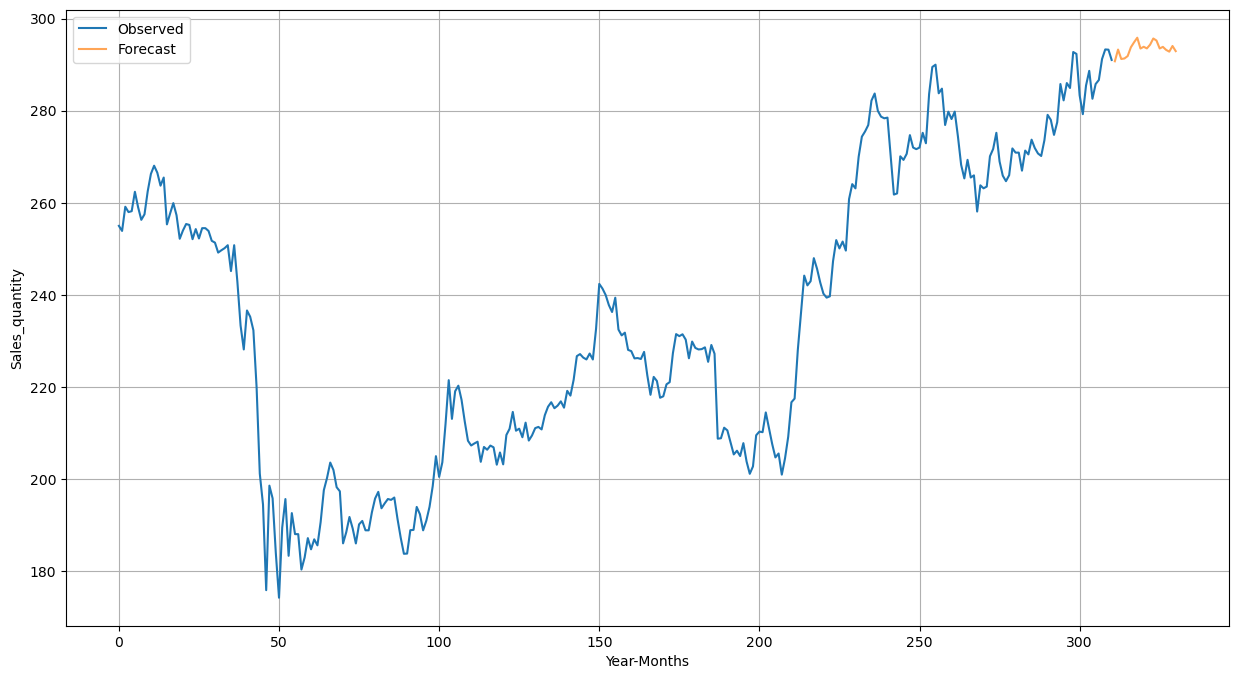

In [91]:
axis = df['Price'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();

In [92]:
resultsDf

RMSE      MAPE
ARIMA(2,1,2)            24.676528  8.141942
ARIMA(3,1,3)            23.750883  7.844811
SARIMA(1,1,3)(3,0,3,6)  19.783019  6.583532
SARIMA(3,1,3)(0,0,3,6)  26.326592  8.728932

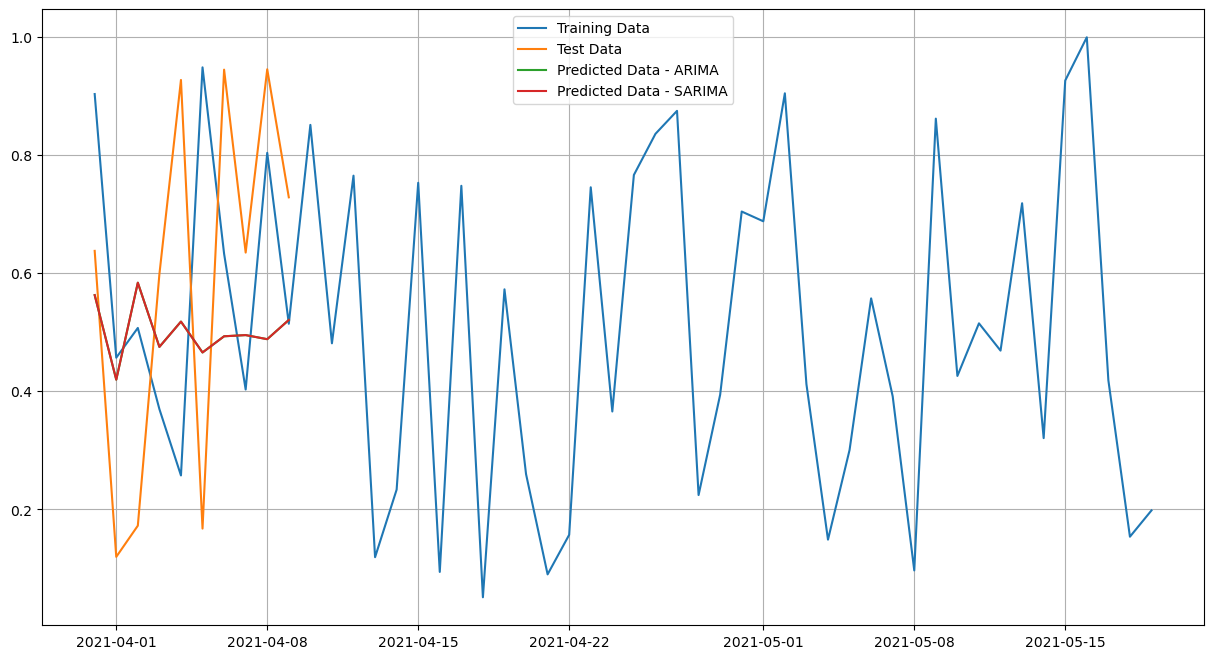

Root Mean Squared Error (RMSE) of the ARIMA model: 0.3177718764476827
Root Mean Squared Error (RMSE) of the SARIMA model: 0.3177718764476827


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Generate sample data
train_final = pd.DataFrame({
    'Price': np.random.rand(50),
    'Date': pd.date_range(start='2021-03-31', periods=50, freq='D')
})

test_final = pd.DataFrame({
    'Price': np.random.rand(10),
    'Date': pd.date_range(start='2021-03-31', periods=10, freq='D')
})

# Define the orders and seasonal orders as tuples
p = 1  # Number of AR terms
d = 1  # Number of differences (integration)
q = 1  # Number of MA terms
seasonal_p = 1  # Number of seasonal AR terms
seasonal_d = 0  # Number of seasonal differences (integration)
seasonal_q = 1  # Number of seasonal MA terms
s = 12  # Seasonal period

# Define and fit ARIMA model
arima_model = ARIMA(train_final['Price'], order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, s))
arima_fit = arima_model.fit()

# Generate predictions
pred_ARIMA = arima_fit.predict(start=len(train_final), end=len(train_final) + len(test_final) - 1)

# Define and fit SARIMA model
sarima_model = SARIMAX(train_final['Price'], order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, s))
sarima_fit = sarima_model.fit()

# Generate predictions
pred_SARIMA = sarima_fit.predict(start=len(train_final), end=len(train_final) + len(test_final) - 1)

# Define and fit Prophet model

# Calculate RMSE
rmse_arima = sqrt(mean_squared_error(test_final['Price'], pred_ARIMA))
rmse_sarima = sqrt(mean_squared_error(test_final['Price'], pred_SARIMA))

# Plotting
plt.plot(train_final['Date'], train_final['Price'], label='Training Data')
plt.plot(test_final['Date'], test_final['Price'], label='Test Data')
plt.plot(test_final['Date'], pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final['Date'], pred_SARIMA, label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid()
plt.show()

# Print RMSE
print("Root Mean Squared Error (RMSE) of the ARIMA model:", rmse_arima)
print("Root Mean Squared Error (RMSE) of the SARIMA model:", rmse_sarima)


# Build Time Series models using the Prophet Library.

In [94]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['Date'])
df_prophet['y'] = df['Price']
df_prophet['High']= df['High']
df_prophet['Low']=df['Low']
df_prophet.head()

ds       y    High     Low
0 2020-01-03  255.00  258.19   253.7
1 2020-01-06  253.90  254.84   251.4
2 2020-01-08  259.15  259.15  253.03
3 2020-01-09  257.99  261.76  257.01
4 2020-01-10  258.19  259.25  256.88

In [95]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

# Drop rows with NaN values
df_prophet_filtered = df_prophet.dropna(subset=['y'])

# Assuming df_prophet is your DataFrame with 'ds' and 'y' columns
prophet = Prophet(seasonality_mode='additive', weekly_seasonality=True)
prophet.add_country_holidays(country_name='US')

# Filter the data if needed (assuming df_prophet is already defined)
df_prophet_filtered = df_prophet[df_prophet['ds'] <= pd.to_datetime('2021-03-31')]

# Fit the model
prophet.fit(df_prophet_filtered)

# Create future DataFrame for forecasting
future = prophet.make_future_dataframe(periods=43, freq='B')

# Make predictions
forecast = prophet.predict(future)

# Plot the forecast using plotly
fig = plot_plotly(prophet, forecast)
fig.show()

# Plot the forecast components using plotly
fig_components = plot_components_plotly(prophet, forecast)
fig_components.show()


10:48:43 - cmdstanpy - INFO - Chain [1] start processing
10:48:44 - cmdstanpy - INFO - Chain [1] done processing


Prophet has included the original data as the black dots and the blue line is the forecast model.

The light blue area is the confidence interval. Using the add_changepoints_to_plot function added the red lines; the vertical dashed lines are changepoints Prophet identified where the trend changed, and the solid red line is the trend with all seasonality removed. 


The components plot consists of 3 sections: the trend, the holidays, and the seasonality. The sum of those 3 components account for the entirety of the model in fact. The trend is simply what the data is showing if you subtract out all of the other components. 

The holidays plot shows the effect of all of the holidays included in the model. Holidays, as implemented in Prophet, can be thought of as unnatural events when the trend will deviate from the baseline but return once the event is over.

The weekly seasonality component shows the change in volumne over 
the week, but with a steep decline on the weekend. 

In [96]:
import holidays
for date, name in sorted(holidays.US(state='NY', years=2021).items()):
   print(date, name) 

2021-01-01 New Year's Day
2021-01-18 Martin Luther King Jr. Day
2021-02-12 Lincoln's Birthday
2021-02-15 Susan B. Anthony Day; Washington's Birthday
2021-05-31 Memorial Day
2021-06-18 Juneteenth National Independence Day (observed)
2021-06-19 Juneteenth National Independence Day
2021-07-04 Independence Day
2021-07-05 Independence Day (observed)
2021-09-06 Labor Day
2021-10-11 Columbus Day
2021-11-02 Election Day
2021-11-11 Veterans Day
2021-11-25 Thanksgiving
2021-12-24 Christmas Day (observed)
2021-12-25 Christmas Day
2021-12-31 New Year's Day (observed)


In [97]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-01-03  274.464274  263.277074  288.906750   274.464274   274.464274   
1   2020-01-06  271.597898  260.548601  287.485340   271.597898   271.597898   
2   2020-01-08  269.686980  260.015063  285.818562   269.686980   269.686980   
3   2020-01-09  268.731522  258.792743  284.989911   268.731522   268.731522   
4   2020-01-10  267.776063  257.006874  283.698388   267.776063   267.776063   
..         ...         ...         ...         ...          ...          ...   
349 2021-05-25  292.672295  279.355837  313.488693   281.306348   304.033579   
350 2021-05-26  292.856431  279.057604  315.759033   281.089633   304.720885   
351 2021-05-27  293.040567  277.478037  313.936166   280.819845   305.374246   
352 2021-05-28  293.224702  277.586141  313.999221   280.542868   306.204868   
353 2021-05-31  293.777109  268.643621  305.391002   280.642544   307.089386   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0              0.0                  0.0                  0.0   
1              0.0                  0.0                  0.0   
2              0.0                  0.0                  0.0   
3              0.0                  0.0                  0.0   
4              0.0                  0.0                  0.0   
..             ...                  ...                  ...   
349            0.0                  0.0                  0.0   
350            0.0                  0.0                  0.0   
351            0.0                  0.0                  0.0   
352            0.0                  0.0                  0.0   
353            0.0                  0.0                  0.0   

     Christmas Day (observed)  ...  holidays  holidays_lower  holidays_upper  \
0                         0.0  ...  0.000000        0.000000        0.000000   
1                         0.0  ...  0.000000        0.000000        0.000000   
2                         0.0  ...  0.000000        0.000000        0.000000   
3                         0.0  ...  0.000000        0.000000        0.000000   
4                         0.0  ...  0.000000        0.000000        0.000000   
..                        ...  ...       ...             ...             ...   
349                       0.0  ...  0.000000        0.000000        0.000000   
350                       0.0  ...  0.000000        0.000000        0.000000   
351                       0.0  ...  0.000000        0.000000        0.000000   
352                       0.0  ...  0.000000        0.000000        0.000000   
353                       0.0  ... -8.966533       -8.966533       -8.966533   

       weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    2.098955      2.098955      2.098955                   0.0   
1    2.622925      2.622925      2.622925                   0.0   
2    4.020814      4.020814      4.020814                   0.0   
3    2.645015      2.645015      2.645015                   0.0   
4    2.098955      2.098955      2.098955                   0.0   
..        ...           ...           ...                   ...   
349  3.998956      3.998956      3.998956                   0.0   
350  4.020814      4.020814      4.020814                   0.0   
351  2.645015      2.645015      2.645015                   0.0   
352  2.098955      2.098955      2.098955                   0.0   
353  2.622925      2.622925      2.622925                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                           0.0                         0.0  276.563229  
1                           0.0                         0.0  274.220823  
2                           0.0                         0.0  273.707794  
3                           0.0                         0.0  271.376536  
4                           0.0                         0.0  269.875018  
..                          ...                         ...         ... 

In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'test_final' and 'forecast' are properly defined DataFrames
test_price_values = test_final['Price'].values
forecast_trimmed = forecast['yhat'].values[-len(test_price_values):]  # Trims 'forecast' to match the length of 'test_final'

rmse = sqrt(mean_squared_error(test_price_values, forecast_trimmed))
print(rmse)


294.07462064541266


In [99]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE      MAPE   Test RMSE
ARIMA(2,1,2)            24.676528  8.141942         NaN
ARIMA(3,1,3)            23.750883  7.844811         NaN
SARIMA(1,1,3)(3,0,3,6)  19.783019  6.583532         NaN
SARIMA(3,1,3)(0,0,3,6)  26.326592  8.728932         NaN
Prophet                       NaN       NaN  294.074621

10:48:45 - cmdstanpy - INFO - Chain [1] start processing
10:48:45 - cmdstanpy - INFO - Chain [1] done processing


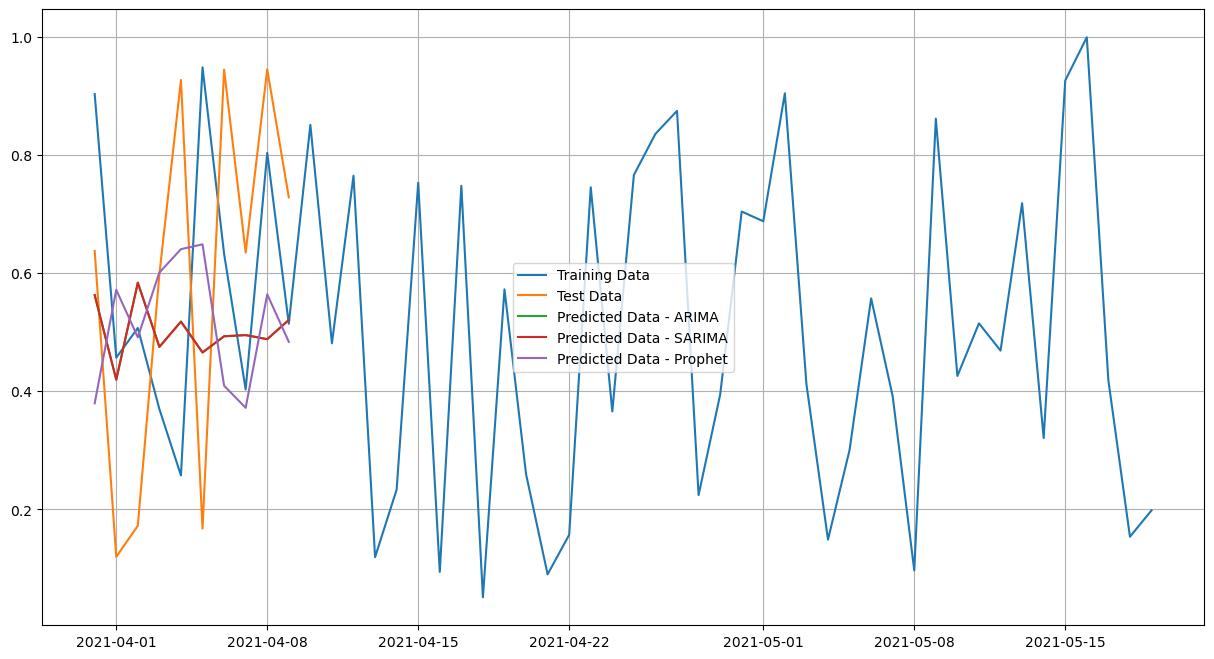

Root Mean Squared Error (RMSE) of the ARIMA model: 0.3177718764476827
Root Mean Squared Error (RMSE) of the SARIMA model: 0.3177718764476827
Root Mean Squared Error (RMSE) of the Prophet model: 0.35281333708257934


In [100]:
from prophet import Prophet

# Convert the 'Date' column to datetime
train_final['Date'] = pd.to_datetime(train_final['Date'])
test_final['Date'] = pd.to_datetime(test_final['Date'])

# Rename the 'Date' column to 'ds' and the 'Price' column to 'y' for Prophet
train_final = train_final.rename(columns={'Date': 'ds', 'Price': 'y'})
test_final = test_final.rename(columns={'Date': 'ds', 'Price': 'y'})

# Define and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_final)

# Generate predictions
future = pd.DataFrame({'ds': test_final['ds']})
pred_prophet = prophet_model.predict(future)

# Plotting
plt.plot(train_final['ds'], train_final['y'], label='Training Data')
plt.plot(test_final['ds'], test_final['y'], label='Test Data')
plt.plot(test_final['ds'], pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final['ds'], pred_SARIMA, label='Predicted Data - SARIMA')
plt.plot(test_final['ds'], pred_prophet['yhat'], label='Predicted Data - Prophet')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate RMSE
rmse_prophet = sqrt(mean_squared_error(test_final['y'], pred_prophet['yhat']))

# Print RMSE
print("Root Mean Squared Error (RMSE) of the ARIMA model:", rmse_arima)
print("Root Mean Squared Error (RMSE) of the SARIMA model:", rmse_sarima)
print("Root Mean Squared Error (RMSE) of the Prophet model:", rmse_prophet)


Additional Regressor: If you have independent variables apart from the target forcasted variables, you can add thems as a regressor variables.

10:48:45 - cmdstanpy - INFO - Chain [1] start processing


Number of missing values in 'High' before filling: 311
Number of missing values in 'Low' before filling: 311
Number of missing values in 'High' after filling: 0
Number of missing values in 'Low' after filling: 0


10:48:45 - cmdstanpy - INFO - Chain [1] done processing


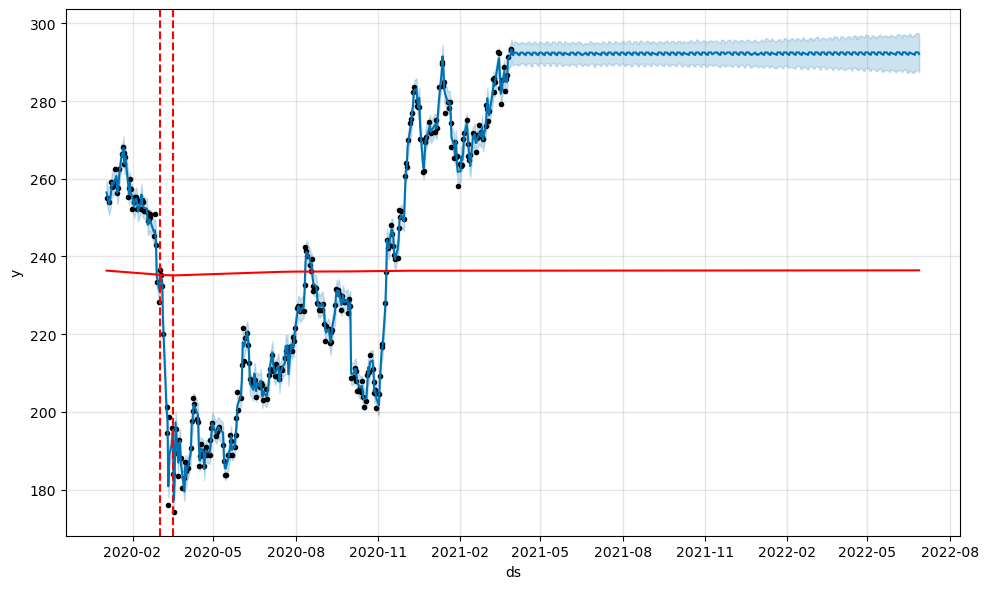

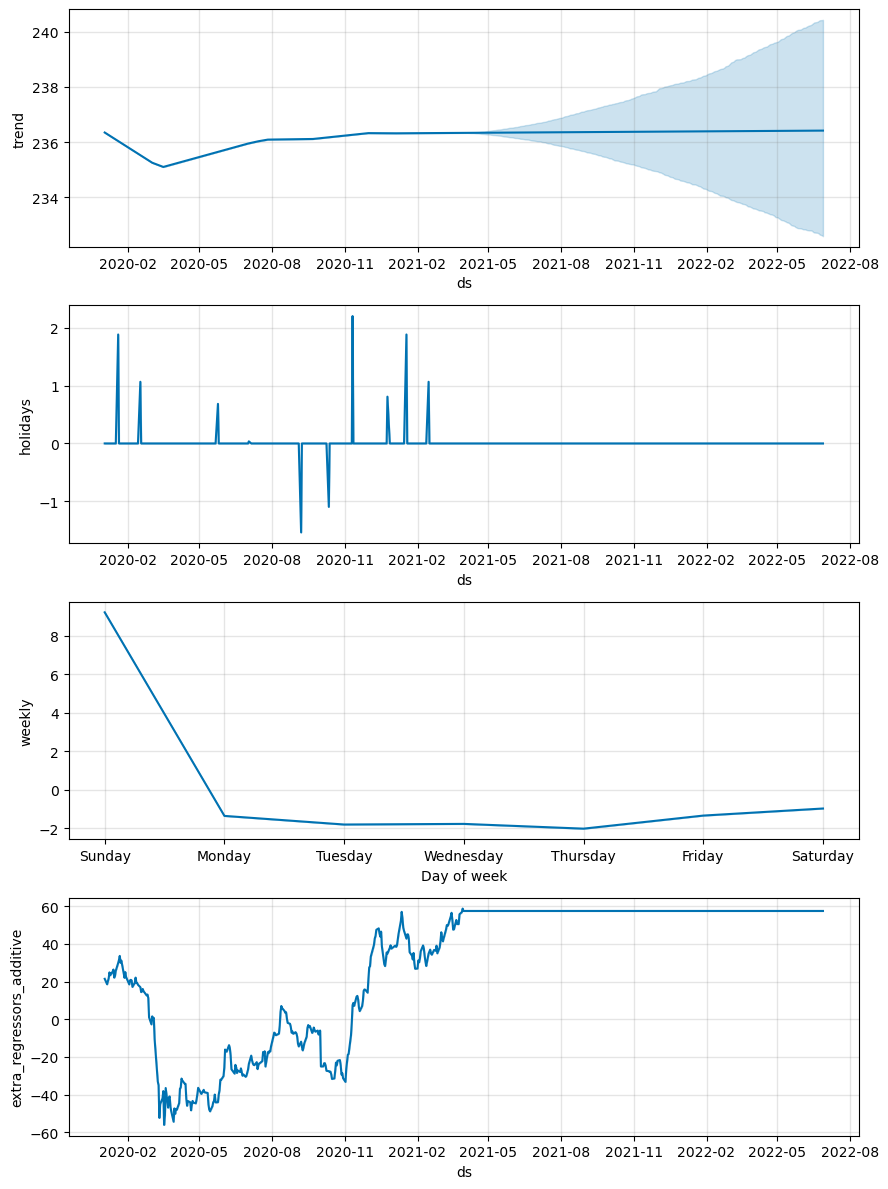

In [101]:
future = df_prophet[['ds']].copy()  # Make sure you only have the 'ds' column
future = prophet.make_future_dataframe(periods=len(df_prophet), freq=us_bd)
future['High'] = df_prophet['High']
future['Low'] = df_prophet['Low']

print(f"Number of missing values in 'High' before filling: {future['High'].isnull().sum()}")
print(f"Number of missing values in 'Low' before filling: {future['Low'].isnull().sum()}")

# Fill missing values with 'ffill' method
future['High'] = future['High'].fillna(method='ffill')
future['Low'] = future['Low'].fillna(method='ffill')

print(f"Number of missing values in 'High' after filling: {future['High'].isnull().sum()}")
print(f"Number of missing values in 'Low' after filling: {future['Low'].isnull().sum()}")

# Fit Prophet model as usual
prophet = Prophet()
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2021-03-31')])

# Predict and plot
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [102]:
print(test_final.columns)

Index(['y', 'ds'], dtype='object')


In [103]:
rmse = sqrt(mean_squared_error(test_final['y'],forecast.tail(10)['yhat']))
print(rmse)

291.58876330022275


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables_2.0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

RMSE      MAPE   Test RMSE
ARIMA(2,1,2)                       24.676528  8.141942         NaN
ARIMA(3,1,3)                       23.750883  7.844811         NaN
SARIMA(1,1,3)(3,0,3,6)             19.783019  6.583532         NaN
SARIMA(3,1,3)(0,0,3,6)             26.326592  8.728932         NaN
Prophet                                  NaN       NaN  294.074621
Prophet - with exog variables_2.0        NaN       NaN  291.588763

10:48:47 - cmdstanpy - INFO - Chain [1] start processing
10:48:47 - cmdstanpy - INFO - Chain [1] done processing


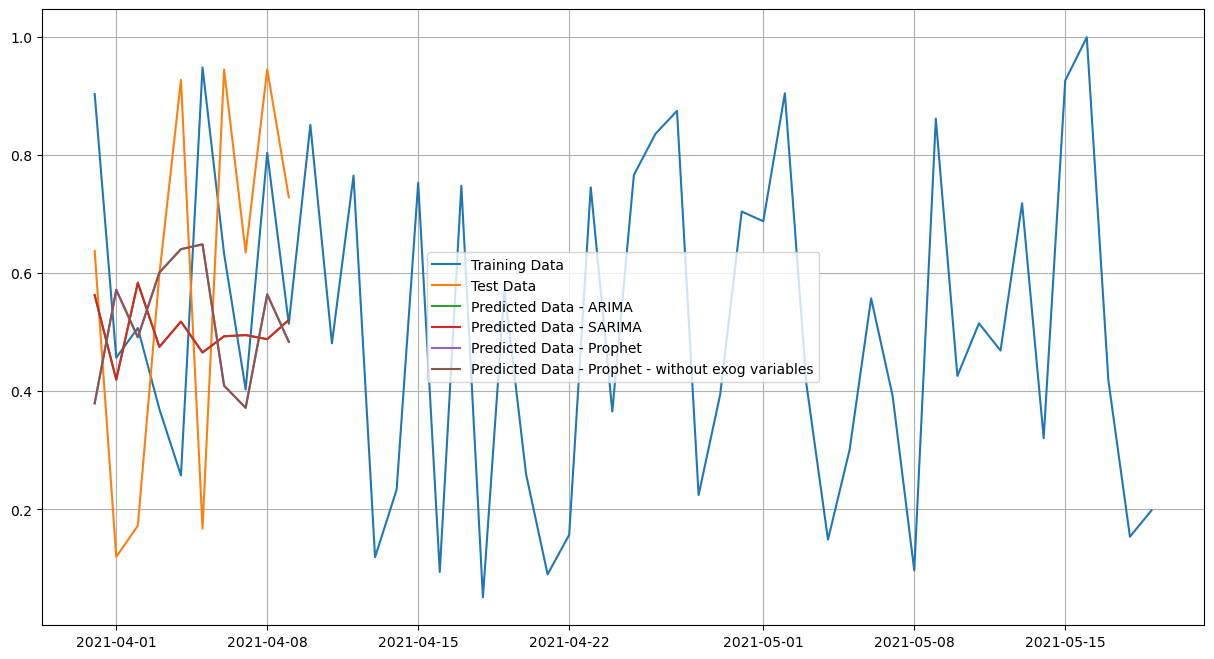

Root Mean Squared Error (RMSE) of the ARIMA model: 0.3177718764476827
Root Mean Squared Error (RMSE) of the SARIMA model: 0.3177718764476827
Root Mean Squared Error (RMSE) of the Prophet model with exog variables: 0.35281333708257934
Root Mean Squared Error (RMSE) of the Prophet model without exog variables: 0.35281333708257934
Difference in RMSE between Prophet models (with and without exog variables): 0.0


In [105]:
import pandas as pd
from prophet import Prophet

# Rename the 'Date' column to 'ds' and the 'Price' column to 'y' for Prophet
train_final = train_final.rename(columns={'Date': 'ds', 'Price': 'y'})
test_final = test_final.rename(columns={'Date': 'ds', 'Price': 'y'})

# Convert the 'Date' column to datetime
train_final['ds'] = pd.to_datetime(train_final['ds'])
test_final['ds'] = pd.to_datetime(test_final['ds'])

# Define and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_final)

# Generate predictions
future = pd.DataFrame({'ds': test_final['ds']})
pred_prophet = prophet_model.predict(future)

# Generate predictions without exogenous variables
future_no_exog = pd.DataFrame({'ds': test_final['ds']})
pred_prophet_no_exog = prophet_model.predict(future_no_exog)

# Plotting
plt.plot(train_final['ds'], train_final['y'], label='Training Data')
plt.plot(test_final['ds'], test_final['y'], label='Test Data')
plt.plot(test_final['ds'], pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final['ds'], pred_SARIMA, label='Predicted Data - SARIMA')

# Plotting Prophet predictions
plt.plot(pred_prophet['ds'], pred_prophet['yhat'], label='Predicted Data - Prophet')
plt.plot(pred_prophet_no_exog['ds'], pred_prophet_no_exog['yhat'], label='Predicted Data - Prophet - without exog variables')

plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate RMSE for both cases
rmse_prophet = sqrt(mean_squared_error(test_final['y'], pred_prophet['yhat']))
rmse_prophet_no_exog = sqrt(mean_squared_error(test_final['y'], pred_prophet_no_exog['yhat']))

# Print RMSE
print("Root Mean Squared Error (RMSE) of the ARIMA model:", rmse_arima)
print("Root Mean Squared Error (RMSE) of the SARIMA model:", rmse_sarima)
print("Root Mean Squared Error (RMSE) of the Prophet model with exog variables:", rmse_prophet)
print("Root Mean Squared Error (RMSE) of the Prophet model without exog variables:", rmse_prophet_no_exog)
print("Difference in RMSE between Prophet models (with and without exog variables):", rmse_prophet - rmse_prophet_no_exog)


Adjusting trend by changepoint_prior_scale: Prophet allow you to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend.
Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
Increasing the changepoint_prior_scale to 0.08 to make the trend flexible


10:48:48 - cmdstanpy - INFO - Chain [1] start processing


Number of missing values in 'High' before filling: 310
Number of missing values in 'Low' before filling: 310
Number of missing values in 'High' after filling: 0
Number of missing values in 'Low' after filling: 0


10:48:48 - cmdstanpy - INFO - Chain [1] done processing


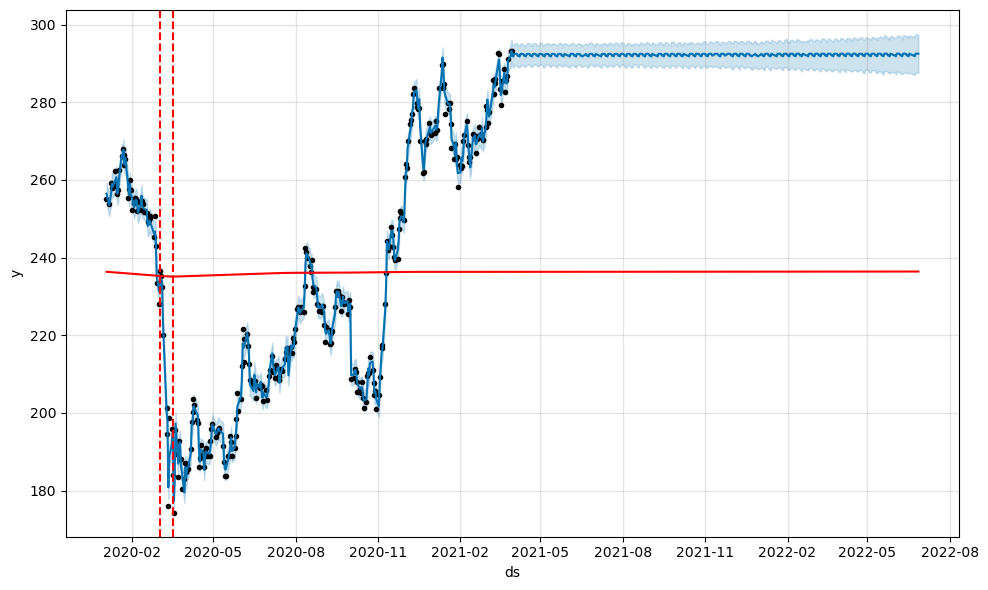

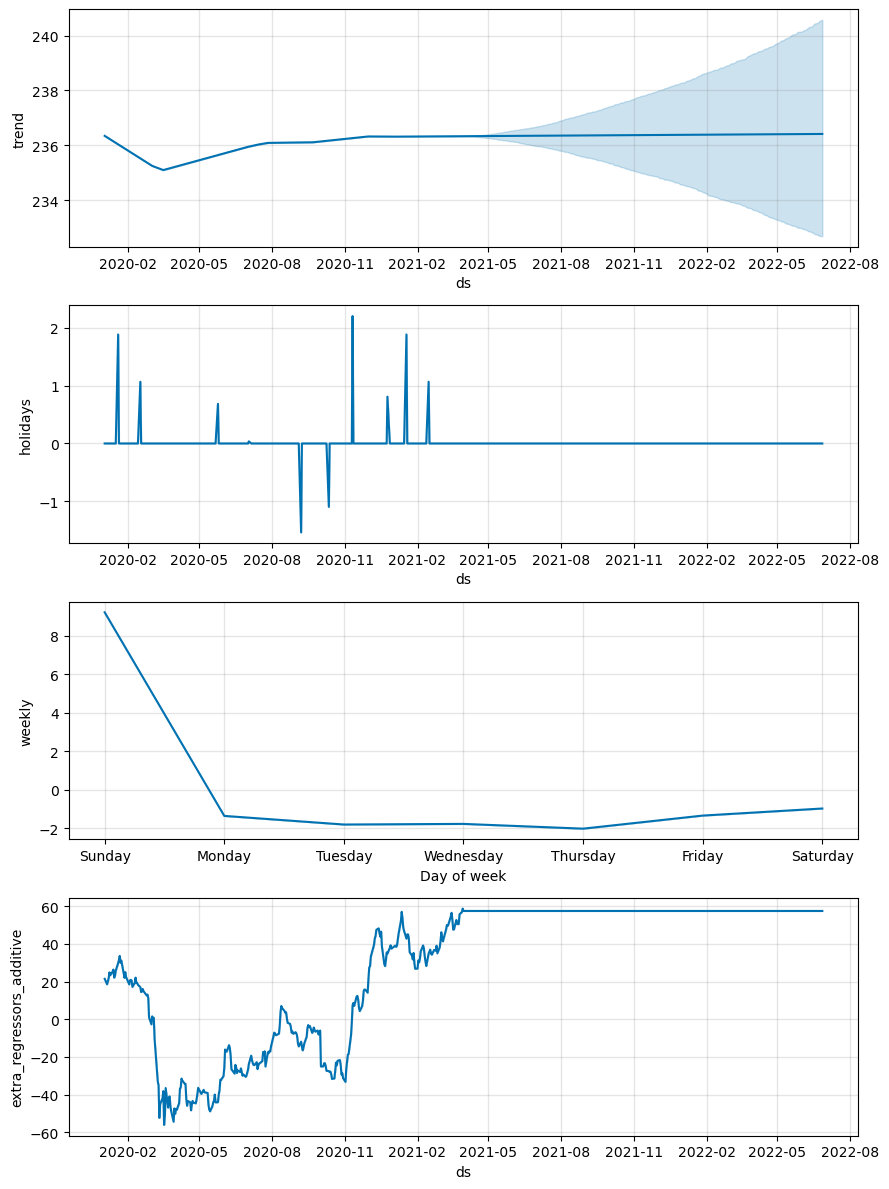

In [106]:
future = df_prophet[['ds']].copy()  # Make sure you only have the 'ds' column
future = prophet.make_future_dataframe(periods=len(df_prophet), freq=us_bd)
future['High'] = df_prophet['High']
future['Low'] = df_prophet['Low']

print(f"Number of missing values in 'High' before filling: {future['High'].isnull().sum()}")
print(f"Number of missing values in 'Low' before filling: {future['Low'].isnull().sum()}")

# Fill missing values with 'ffill' method
future['High'] = future['High'].fillna(method='ffill')
future['Low'] = future['Low'].fillna(method='ffill')

print(f"Number of missing values in 'High' after filling: {future['High'].isnull().sum()}")
print(f"Number of missing values in 'Low' after filling: {future['Low'].isnull().sum()}")

# Fit Prophet model as usual
prophet = Prophet()
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2021-03-31')])

# Predict and plot
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


## Adding weekends

In [107]:
import pandas as pd

# Define a range of dates using the pd.date_range function
weekend = pd.DataFrame({
  'holiday': 'Weekend',
  'ds': pd.date_range(start='2020-01-05', end='2021-03-28', freq='W'),
  'lower_window': -1,
  'upper_window': 0,
})

print(weekend)


    holiday         ds  lower_window  upper_window
0   Weekend 2020-01-05            -1             0
1   Weekend 2020-01-12            -1             0
2   Weekend 2020-01-19            -1             0
3   Weekend 2020-01-26            -1             0
4   Weekend 2020-02-02            -1             0
..      ...        ...           ...           ...
60  Weekend 2021-02-28            -1             0
61  Weekend 2021-03-07            -1             0
62  Weekend 2021-03-14            -1             0
63  Weekend 2021-03-21            -1             0
64  Weekend 2021-03-28            -1             0

[65 rows x 4 columns]


In [108]:
#Cross Validation of developed time series model. This is a function is for cross validation. Its creates train and test dataset. Initial days define train data
#and horizon data define test data.
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='208 days',period = '25 days', horizon = '43 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

  0%|          | 0/9 [00:00<?, ?it/s]

10:48:49 - cmdstanpy - INFO - Chain [1] start processing
10:48:49 - cmdstanpy - INFO - Chain [1] done processing
10:48:50 - cmdstanpy - INFO - Chain [1] start processing
10:48:50 - cmdstanpy - INFO - Chain [1] done processing
10:48:50 - cmdstanpy - INFO - Chain [1] start processing
10:48:50 - cmdstanpy - INFO - Chain [1] done processing
10:48:50 - cmdstanpy - INFO - Chain [1] start processing
10:48:50 - cmdstanpy - INFO - Chain [1] done processing
10:48:50 - cmdstanpy - INFO - Chain [1] start processing
10:48:50 - cmdstanpy - INFO - Chain [1] done processing
10:48:51 - cmdstanpy - INFO - Chain [1] start processing
10:48:51 - cmdstanpy - INFO - Chain [1] done processing
10:48:51 - cmdstanpy - INFO - Chain [1] start processing
10:48:51 - cmdstanpy - INFO - Chain [1] done processing
10:48:51 - cmdstanpy - INFO - Chain [1] start processing
10:48:51 - cmdstanpy - INFO - Chain [1] done processing
10:48:51 - cmdstanpy - INFO - Chain [1] start processing
10:48:51 - cmdstanpy - INFO - Chain [1]

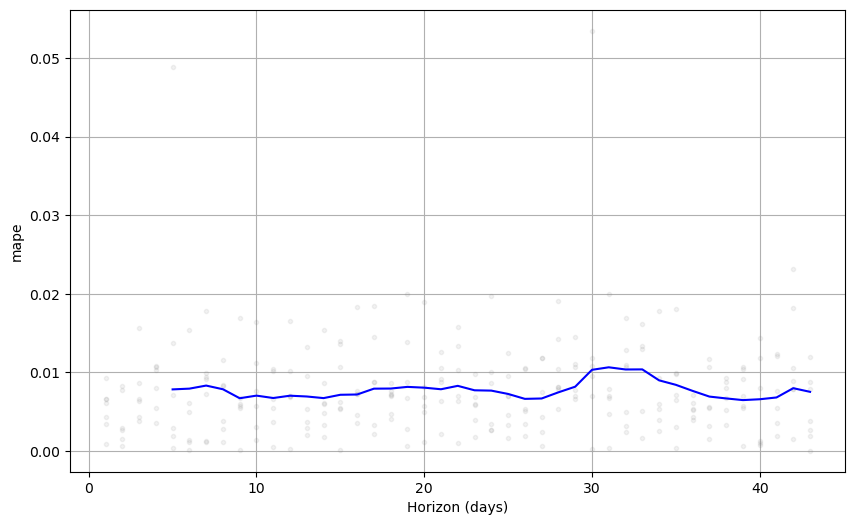

In [109]:
# Time series model performance (Cross validation performance metrics can be visualized with plot_cross_validation_metric,
# here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE,
#where the mean is taken over a rolling window of the dots.)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [110]:
df_cv

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0   2020-07-31  220.807567  218.027898  223.860076  221.57 2020-07-30
1   2020-08-03  225.917434  222.782095  229.185630  226.72 2020-07-30
2   2020-08-04  227.245497  224.334669  230.234302  227.16 2020-07-30
3   2020-08-05  227.774604  224.818455  230.863083  226.40 2020-07-30
4   2020-08-06  226.285449  223.317876  229.482484  226.00 2020-07-30
..         ...         ...         ...         ...     ...        ...
264 2021-03-24  284.238138  281.650176  287.146387  285.79 2021-02-15
265 2021-03-25  283.995201  281.230699  286.996797  286.66 2021-02-15
266 2021-03-26  289.615340  286.839556  292.696044  291.22 2021-02-15
267 2021-03-29  290.679844  287.898022  293.406249  293.30 2021-02-15
268 2021-03-30  292.134173  289.382241  295.071645  293.25 2021-02-15

[269 rows x 6 columns]

# Applying LSTM Model

In [111]:
df_pd = df_date.copy()
print(df_pd)


             Date   Price Time_Stamp
0    Jan 03, 2020  255.00 2020-01-03
1    Jan 06, 2020  253.90 2020-01-06
2    Jan 08, 2020  259.15 2020-01-07
3    Jan 09, 2020  257.99 2020-01-08
4    Jan 10, 2020  258.19 2020-01-09
..            ...     ...        ...
306  Mar 25, 2021  286.66 2021-03-24
307  Mar 26, 2021  291.22 2021-03-25
308  Mar 29, 2021  293.30 2021-03-26
309  Mar 30, 2021  293.25 2021-03-29
310  Mar 31, 2021  291.02 2021-03-30

[311 rows x 3 columns]


In [112]:
# We have considered Price as a dependent variable for this session. Readers are advised to look at  'Vol.','open' price as dependent variable for univariate Time Series Prediction
df_date = df[['Date','Price']]

In [113]:

df_pd['Date'] = pd.to_datetime(df_pd['Date'])

In [114]:

df_pd['Price'] = df_pd['Price'].astype(float)

In [115]:
df_pd.dtypes     

Date          datetime64[ns]
Price                float64
Time_Stamp    datetime64[ns]
dtype: object

In [116]:
import pandas as pd

# Assuming df['Date'] contains strings in the format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'])

specific_date_str = "2020-12-31"
specific_date = pd.to_datetime(specific_date_str)

filtered_df = df[df['Date'] <= specific_date]

In [117]:
filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

In [118]:

# Convert the 'date' column to datetime objects
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

In [119]:
print(filtered_df)

            ds       y    Open    High     Low Time_Stamp
0   2020-01-03  255.00  255.99  258.19   253.7 2020-01-03
1   2020-01-06  253.90  254.75  254.84   251.4 2020-01-06
2   2020-01-08  259.15  253.57  259.15  253.03 2020-01-07
3   2020-01-09  257.99   259.4  261.76  257.01 2020-01-08
4   2020-01-10  258.19  257.86  259.25  256.88 2020-01-09
..         ...     ...     ...     ...     ...        ...
245 2020-12-24  269.32  271.98  272.82  267.13 2020-12-23
246 2020-12-25  270.64  269.97     271  268.28 2020-12-24
247 2020-12-28  274.70   270.9  275.19  269.73 2020-12-28
248 2020-12-29  272.00  275.91  276.43  271.26 2020-12-29
249 2020-12-30  271.65  272.49  274.24  270.12 2020-12-30

[250 rows x 6 columns]


In [120]:
df_Test = df[df['Date'] > specific_date]

In [121]:

df_Test
     

Date   Price    Open    High     Low Time_Stamp
250 2021-01-04  272.00  274.67   276.6  270.61 2020-12-31
251 2021-01-05  275.20  272.69   275.7  270.28 2021-01-04
252 2021-01-06  272.93  275.94  275.94  271.62 2021-01-05
253 2021-01-08  283.64  275.11  283.99  275.11 2021-01-06
254 2021-01-11  289.49  282.86  292.95  279.48 2021-01-07
..         ...     ...     ...     ...     ...        ...
306 2021-03-25  286.66   286.5  287.03  283.85 2021-03-24
307 2021-03-26  291.22  288.63  292.75  288.32 2021-03-25
308 2021-03-29  293.30  289.72  294.09  289.26 2021-03-26
309 2021-03-30  293.25  294.86  295.72   291.5 2021-03-29
310 2021-03-31  291.02     294  294.42  290.26 2021-03-30

[61 rows x 6 columns]

# Plotting Current Prices of year 2020

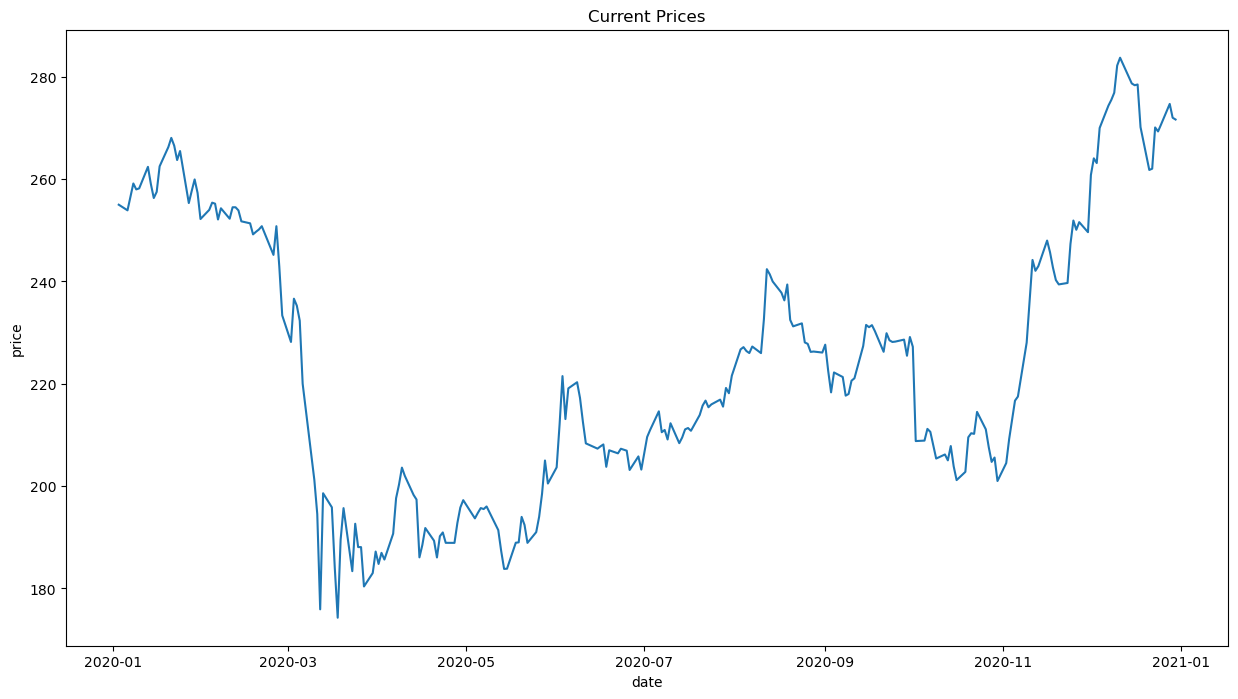

In [122]:
# plot the time series
plt.plot(filtered_df['ds'],filtered_df['y'])
# plt.plot(df_sorted['ds'])
plt.xlabel('date')
plt.ylabel('price')
plt.title('Current Prices')
plt.show()
     

# LSTM Data preparation

In [123]:
train = df_pd[df_pd['Date'] < specific_date]

In [124]:
print(train.shape)

(250, 3)


In [125]:
test = df_pd[df_pd['Date'] >= specific_date]

In [126]:
print(test.shape)

(61, 3)


In [127]:
import pandas as pd

# Assuming df is your DataFrame and specific_date_str is the specific date string
specific_date_str = "2020-12-31"
specific_date = pd.to_datetime(specific_date_str)

# Filter the DataFrame before the Q1 of the second year
filtered_df = df[df['Date'] <= specific_date]

In [128]:
filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

In [129]:
# Convert the 'date' column to datetime objects filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

In [130]:
print(filtered_df)

            ds       y    Open    High     Low Time_Stamp
0   2020-01-03  255.00  255.99  258.19   253.7 2020-01-03
1   2020-01-06  253.90  254.75  254.84   251.4 2020-01-06
2   2020-01-08  259.15  253.57  259.15  253.03 2020-01-07
3   2020-01-09  257.99   259.4  261.76  257.01 2020-01-08
4   2020-01-10  258.19  257.86  259.25  256.88 2020-01-09
..         ...     ...     ...     ...     ...        ...
245 2020-12-24  269.32  271.98  272.82  267.13 2020-12-23
246 2020-12-25  270.64  269.97     271  268.28 2020-12-24
247 2020-12-28  274.70   270.9  275.19  269.73 2020-12-28
248 2020-12-29  272.00  275.91  276.43  271.26 2020-12-29
249 2020-12-30  271.65  272.49  274.24  270.12 2020-12-30

[250 rows x 6 columns]


In [131]:
df_Test = df[df['Date'] > specific_date]

In [132]:
print(test.shape)

(61, 3)


In [133]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the 'Price' values and scale them
df_scaled = scaler.fit_transform(df_pd['Price'].values.reshape(-1,1))

# Create a new DataFrame with the scaled values
df_scaled = pd.DataFrame(df_scaled, columns=['Price'])

# Include the 'Date' column from the original DataFrame
df_scaled['Date'] = df_pd['Date']

# Display the scaled DataFrame
print(df_scaled)

        Price       Date
0    0.678232 2020-01-03
1    0.668991 2020-01-06
2    0.713098 2020-01-08
3    0.703352 2020-01-09
4    0.705032 2020-01-10
..        ...        ...
306  0.944216 2021-03-25
307  0.982525 2021-03-26
308  1.000000 2021-03-29
309  0.999580 2021-03-30
310  0.980845 2021-03-31

[311 rows x 2 columns]


In [134]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Price' values
df_scaled = scaler.fit_transform(df_pd['Price'].values.reshape(-1,1))

# Note: You have commented out the following lines, but I've left them here for reference.
# df_scaled_test = scaler.fit_transform(test['Price'].values.reshape(-1,1))
# df_scaled = pd.DataFrame(df_scaled, columns=['Price'])
# df_scaled['Date'] = df['Date']

In [135]:
# Define the fraction of data for training
train_fraction = 0.7  # Assuming 70% of the data is used for training

# Calculate the size of the training set
train_size = int(len(df_scaled) * train_fraction)

# Split the data into training and testing sets
train_data, test_data = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create sequences of data for training
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Number of previous time steps to use for prediction
look_back = 30

# Create sequences of data for training
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [136]:
# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [137]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((187, 30, 1), (187,), (64, 30, 1), (64,))

# Training LSTM Model

In [138]:
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate synthetic data
n_samples = 1000
n_features = 10
X_train = np.random.rand(n_samples, n_features)
y_train = np.random.rand(n_samples)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(n_features, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16)





Epoch 1/100

63/63 [==============================] - 3s 4ms/step - loss: 0.0993
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0888
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0874
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0877
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0869
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0871
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0861
Epoch 8/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 9/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0859
Epoch 10/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0877
Epoch 11/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0860
Epoch 12/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0864
Epoch 13/100
63/63 [=============

In [139]:
import numpy as np

# Assuming X_train is your training dataset and has shape (num_samples, num_timesteps, num_features)
# Add a new axis for the number of samples
X_train_reshaped = np.expand_dims(X_train[-1], axis=0)

# Make predictions on the reshaped training data
predict_X = model.predict(X_train_reshaped)

1/1 [==============================] - 1s 623ms/step


In [140]:
from sklearn.preprocessing import MinMaxScaler

# Assuming scaler is the MinMaxScaler object you used to scale your training data
# Make predictions and inverse transform
predict_X = model.predict(X_train)
predict_X = scaler.inverse_transform(predict_X)

32/32 [==============================] - 0s 3ms/step


In [141]:
print(predict_X)

[[241.89792]
 [240.29874]
 [238.24861]
 [239.1619 ]
 [237.73277]
 [239.45108]
 [238.97891]
 [239.9829 ]
 [241.88364]
 [240.58308]
 [241.31998]
 [241.08449]
 [237.59492]
 [240.55003]
 [241.52286]
 [240.78526]
 [239.76938]
 [240.89325]
 [239.21474]
 [241.24654]
 [237.14569]
 [239.14972]
 [240.41707]
 [238.45375]
 [240.25597]
 [239.64676]
 [240.68503]
 [238.50958]
 [237.56644]
 [241.36626]
 [241.31192]
 [241.0866 ]
 [238.54077]
 [238.16055]
 [240.74661]
 [241.48143]
 [239.57904]
 [239.24377]
 [239.07532]
 [241.62224]
 [237.56242]
 [238.98027]
 [241.71013]
 [239.36856]
 [240.26138]
 [241.91446]
 [239.72696]
 [239.84853]
 [242.31458]
 [241.07549]
 [240.81702]
 [239.94807]
 [240.11574]
 [240.70398]
 [239.6833 ]
 [242.3335 ]
 [241.87584]
 [242.2829 ]
 [239.56148]
 [235.48973]
 [237.53725]
 [242.05846]
 [242.30847]
 [240.29393]
 [241.74387]
 [239.32051]
 [238.38463]
 [242.5669 ]
 [241.1704 ]
 [237.41339]
 [241.78459]
 [240.25693]
 [237.06288]
 [240.14883]
 [240.61473]
 [240.65932]
 [241.94753]

In [142]:
predict_X = model.predict(np.expand_dims(X_train[-1], axis=0))

1/1 [==============================] - 0s 28ms/step


In [143]:
# Reshape predict_X to have a shape of (1, 1)
predict_X = predict_X.reshape(1, 1)

# Inverse transform predictions to original scale
predict_X = scaler.inverse_transform(predict_X)

     

In [144]:
print(predict_X)
     

[[238.27486]]


In [145]:
# Create a copy of X_test to store the updated values
X_test_updated = X_train[-1].reshape(-1, 1)
num_days_to_predict = len(test)
print(X_test_updated.shape)

(10, 1)


In [146]:
# Make predictions for the next 90 days and update X_test
predictions_list = []
for i in range(num_days_to_predict):
    # Make predictions for the current day
    predictions_new = model.predict(X_test_updated)
    #predictions = scaler.inverse_transform(predictions)

    # Append the predictions to X_test_updated for the next day
    X_test_updated = np.append(X_test_updated, predictions_new, axis=1)

    # Delete the first element from the array
    X_test_updated = X_test_updated[:, 1:]

    # Append the predictions to the list for plotting later
    predictions_list.append(predictions_new[0, 0])  # Assuming the prediction is a single value (e.g., the first column)

# reshape the predictions_list
predictions_list = np.array(predictions_list).reshape(-1, 1)
# apply the scaler.inverse_transform functio nto all the values in the predictions_list
predictions_list = scaler.inverse_transform(predictions_list)
# make a data frame from the predictions_list and add a column based on df['Date'][252:]
df_predictions = pd.DataFrame(predictions_list, columns=['Price'])
     

1/1 [==============================] - 0s 30ms/step


In [147]:
# Filter the dates to keep only those from the year 2021
dates_2021 = test['Date']

# Reset the index to start from 0
dates_2021.reset_index(drop=True, inplace=True)

# Assign the filtered dates to the 'Date' column in 'df_predictions'
df_predictions['Date'] = dates_2021

df_predictions = df_predictions[['Date','Price']]
     

# Plotting Actual vs Forecasted for the 1st Quarter 2021

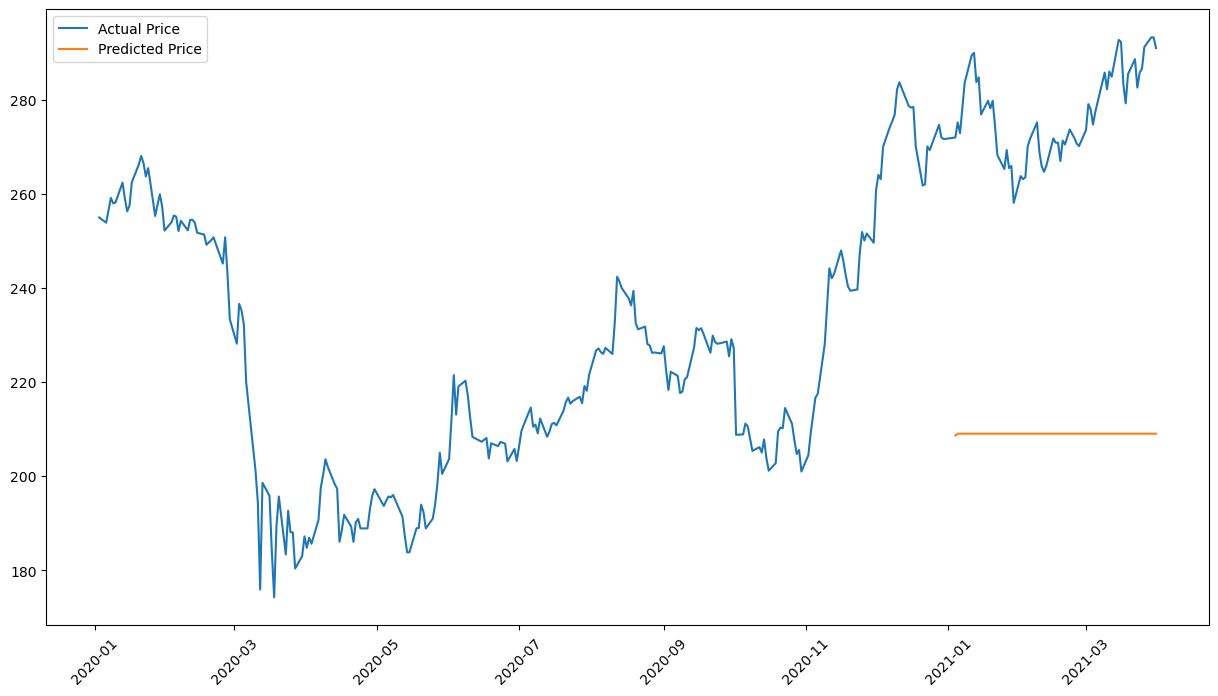

In [148]:
# plot the predictions_list
plt.plot(df_pd['Date'], df_pd['Price'], label ='Actual Price')
plt.tick_params(axis='x', rotation=45)
plt.plot(df_predictions['Date'],df_predictions['Price'], label = 'Predicted Price')
plt.legend()
plt.show()

In [149]:
# Define the window size
window = 10

# Concatenate the last window of the original data with the predictions
df_predictions_Bolinger = pd.concat([train[['Date','Price']].tail(window),df_predictions]).reset_index(drop=True)

In [150]:

df_predictions_Bolinger
     

Date       Price
0  2020-12-17  278.500000
1  2020-12-18  270.160000
2  2020-12-21  261.790000
3  2020-12-22  262.040000
4  2020-12-23  270.100000
..        ...         ...
66 2021-03-25  209.040359
67 2021-03-26  209.040359
68 2021-03-29  209.040359
69 2021-03-30  209.040359
70 2021-03-31  209.040359

[71 rows x 2 columns]

# Calculating Bolinger for LSTM

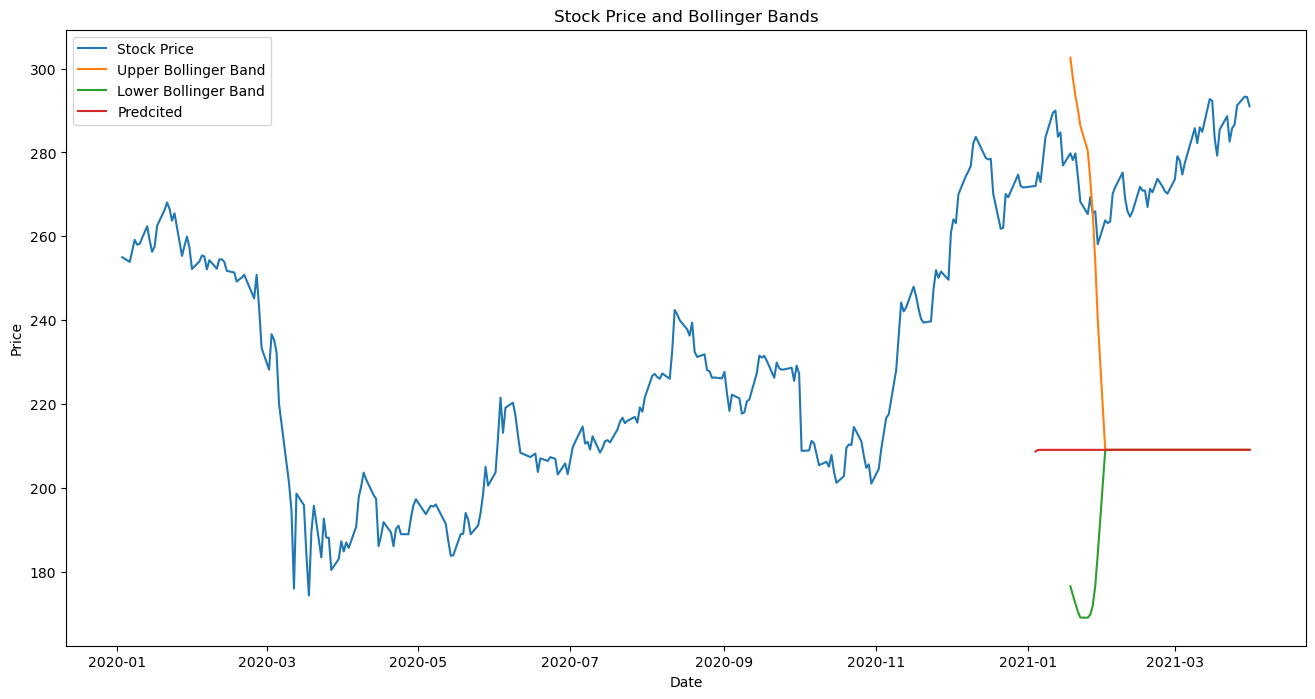

In [151]:
# Calculate Bollinger Bands
def calculate_bollinger_bands(db, window):
    db['SMA'] = db['Price'].rolling(window=window).mean()
    db['STD'] = db['Price'].rolling(window=window).std()
    db['High'] = db['SMA'] + (2 * db['STD'])
    db['Low'] = db['SMA'] - (2 * db['STD'])
    return db

window_size = 20

# Visualize the stock prices and Bollinger Bands
df_b = calculate_bollinger_bands(df_predictions_Bolinger, window_size)

plt.figure(figsize=(16, 8))
plt.plot(df_pd['Date'], df_pd['Price'], label='Stock Price')
plt.plot(df_b['Date'], df_b['High'], label='Upper Bollinger Band')
plt.plot(df_b['Date'], df_b['Low'], label='Lower Bollinger Band')
plt.plot(df_predictions['Date'], df_predictions['Price'],label='Predcited')
plt.title('Stock Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Buy/Hold/Sell Strategy

In [152]:
test = test.reset_index(drop=True)     

In [153]:
df_b = df_b.tail(len(test)).reset_index(drop=True)

In [154]:
df_b['Signal'] = ''

In [155]:
for i in range(len(test)):
  if test['Price'][i] < df_b['Low'][i]:
    df_b['Signal'][i] = 'BUY'
  elif test['Price'][i] > df_b['Low'][i] and test['Price'][i] < df_b['High'][i]:
    df_b['Signal'][i] = 'HOLD'
  else: df_b['Signal'][i] = 'Sell'

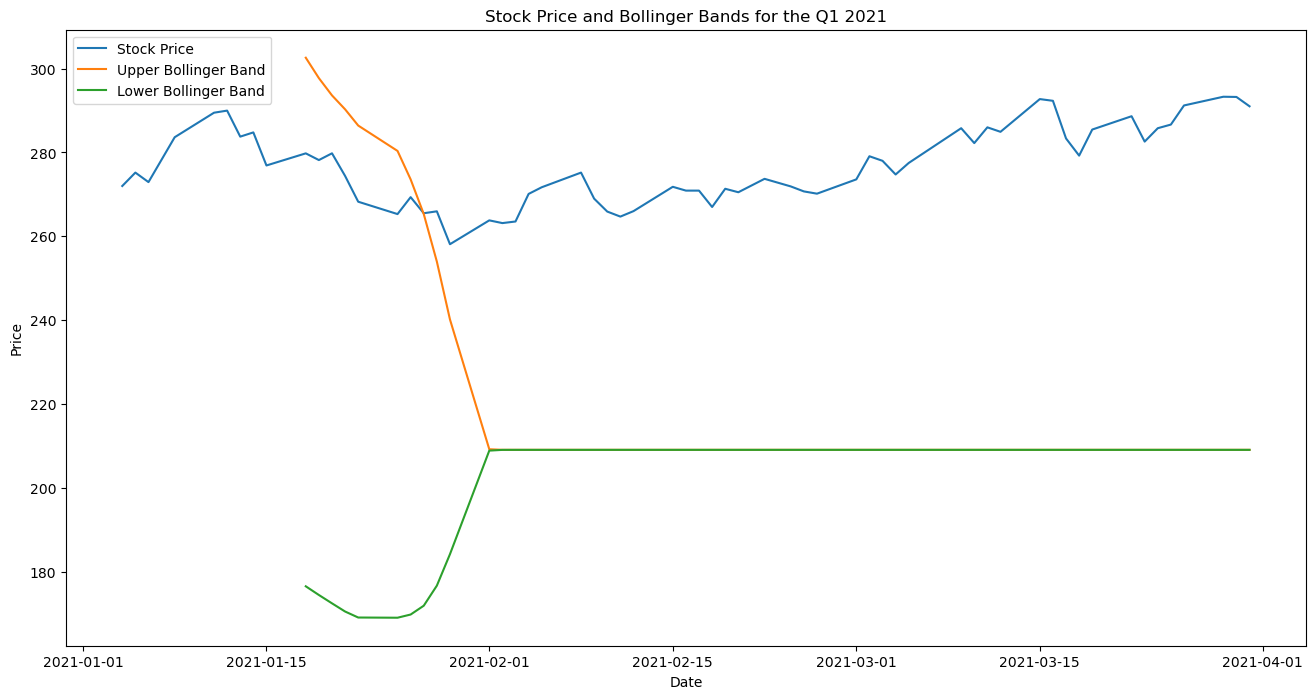

Signal
Sell    54
HOLD     7
Name: count, dtype: int64


In [156]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.plot(test['Date'], test['Price'], label='Stock Price')
plt.plot(df_b['Date'].tail(len(test)), df_b['High'].tail(len(test)), label='Upper Bollinger Band')
plt.plot(df_b['Date'].tail(len(test)), df_b['Low'].tail(len(test)), label='Lower Bollinger Band')

# plt.plot(df_predictions['Date'], df_predictions['Price'],label='Predcited')
plt.title('Stock Price and Bollinger Bands for the Q1 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display buy/sell signals
print(df_b['Signal'].value_counts())

# Conclusion

In conclusion, we met the goal of the project to predict stock price valuations on a daily, weekly and monthly basis and recommend BUY, HOLD, SELL decisions. Here is my methodology:

* Read and explored the data
* Visualized data with multi plots techniques
* Preprocessed the data

Used 4 different models for the modeling part:
 * 1 additive regression model (Prophet by Facebook)
 * 2 statistical models(ARIMA/SARIMA and SARIMAX)
 * 1 deep learning model (LSTM).
* Compared forecasting results
* Used Bollinger Bands technique to visualize my forecasting prices
* Made recommendations to either Buy, Sell, or Hold.

**ARIMA Models:** Both ARIMA(2,1,2) and ARIMA(3,1,3) models have comparable RMSE and  MAPE values, around 24-26, which indicates similar predictive accuracy.

**SARIMA Models:** The SARIMA(1,1,3)(3,0,3,6) model has the lowest RMSE of approximately 19.78, indicating that it provides the best fit among the SARIMA models tested.

**Prophet Models:** The Prophet model has a much higher RMSE compared to the ARIMA and SARIMA models. The RMSE for the Prophet model is around 294, and for Prophet with exogenous variables, it is around 291.5. This suggests that the Prophet models, as currently configured, might not be the most suitable for forecasting the given data.

Based on these observations, the SARIMA(1,1,3)(3,0,3,6) model seems to be the best-performing one among the ones tested. However, it would be prudent to do further evaluation using multiple metrics and consider model selection based on both statistical diagnostics and business context.
